# Part (1)- data imputation 

## upload matlab's data

In [638]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets

# import requests
# import pandas as pd
# import numpy as np
# import json
# from pandas.io.json import json_normalize
# from datetime import datetime, timedelta
# from dateutil.relativedelta import relativedelta
# from matplotlib import pyplot as plt
# import matplotlib.cm as cm
# import itertools
# import metpy as mp
# import metpy.calc as mpcalc
# import plotly as py
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# from scipy import special
# import ipywidgets as widgets
# from metpy.units import units


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

In [639]:
PM25_dict = loadmat('/Users/iditbela/Documents/Broday/AQMdataQC/LoadDataVar_PM25_2000#2018.mat')

In [640]:
PM25_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'StNames_Titles', 'SelYears', 'TA', 'README_TA', 'DATA', 'StNames', 'StTypes', 'fffSt', 'README_DATA', 'VarName', 'VarCode', 'VarUnits'])

In [641]:
PM25_dict['SelYears']

array([[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]], dtype=uint16)

In [642]:
type(PM25_dict['DATA']),PM25_dict['DATA'].shape

(numpy.ndarray, (69, 333122))

In [643]:
data = PM25_dict['DATA']
columns = PM25_dict['StNames']

In [644]:
col_list = []
for c in columns:
    col_list.append(c[0][0])

In [645]:
# col_list

In [646]:
np.shape(col_list)

(69,)

In [647]:
PM25 = pd.DataFrame(data.T, columns = col_list)

In [648]:
PM25.tail()

,AFULA,ANTOKOLSKY,AZUR,EHAD_HAAM,HATIKVA,HOLON,IRONID,KVISH4,PETAH_TIKVA_ROAD,RAKEVET_HASHALOM,...,RAANANA,SHFEYA,UM_EL_FAHEM_C,BEIT_RIVKA,BEN_GURION_AIRPORT,BNEI_ATAROT,MODEIN,ASHALIM,GUSH_EZION,NEOT_HAKIKAR
333117,18.9,26.9,NaN,45.0,NaN,28.9,23.1,NaN,NaN,76.3,...,33.4,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333118,26.3,28.5,NaN,39.8,NaN,21.8,28.8,NaN,NaN,74.0,...,18.6,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333119,22.7,29.3,NaN,39.6,NaN,24.1,23.1,NaN,NaN,55.3,...,32.3,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333120,13.3,27.2,NaN,40.4,NaN,45.0,29.5,NaN,NaN,46.0,...,49.8,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## save dataframe

In [649]:
PM25.to_pickle("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/PM25")

In [650]:
PM25 = pd.read_pickle("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/PM25")

## plot map of missing data

In [651]:
PM25.shape

(333122, 69)

In [684]:
# see what year I get the highest number of stations 
# and the lowest missing station data rate in each timestep
for year in range(2000,2016):
    times = pd.date_range(start=np.str(year)+'-01-01 00:00:00', end='2018-12-31 23:00:00', freq='30Min') #one less because the last is always nan
    start_year = PM25.shape[0]-times.shape[0]-1
    # reduced PM25 
    r_PM25 = PM25[start_year:-1]
    idx = r_PM25.notnull().sum(axis = 0)/r_PM25.shape[0]>0.5
    r_PM25 = r_PM25.loc[:, idx]
    r_PM25.reset_index(inplace=True)
    r_PM25.drop(labels = 'index',axis=1, inplace=True)
    no_s = np.sum(PM25[start_year:].notnull().sum(axis = 0)/PM25[start_year:].shape[0] > 0.5) 
    per = np.median(r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1])
    print('year:{}, no_stations:{}, avg_percentage:{}'.format(year,no_s,per))

year:2000, no_stations:19, avg_percentage:0.15789473684210525
year:2001, no_stations:21, avg_percentage:0.19047619047619047
year:2002, no_stations:23, avg_percentage:0.21739130434782608
year:2003, no_stations:23, avg_percentage:0.17391304347826086
year:2004, no_stations:23, avg_percentage:0.17391304347826086
year:2005, no_stations:23, avg_percentage:0.17391304347826086
year:2006, no_stations:23, avg_percentage:0.17391304347826086
year:2007, no_stations:25, avg_percentage:0.2
year:2008, no_stations:27, avg_percentage:0.18518518518518517
year:2009, no_stations:31, avg_percentage:0.1935483870967742
year:2010, no_stations:33, avg_percentage:0.21212121212121213
year:2011, no_stations:35, avg_percentage:0.2
year:2012, no_stations:35, avg_percentage:0.17142857142857143
year:2013, no_stations:35, avg_percentage:0.17142857142857143
year:2014, no_stations:40, avg_percentage:0.2
year:2015, no_stations:41, avg_percentage:0.1951219512195122


In [744]:
times = pd.date_range(start='2014-01-01 00:00:00', end='2018-12-31 23:00:00', freq='30Min') #one less because the last is always nan
start_year = PM25.shape[0]-times.shape[0]-1
start_year
start_year/PM25.shape[0]*19

245474

14.000894567155576

In [745]:
# percentage of not-null should be more than 50%
# how many stations?
np.sum(PM25[start_year:].notnull().sum(axis = 0)/PM25[start_year:].shape[0] > 0.5)

40

In [746]:
# according to what I see, if I take starting 2010 (meaning I will have 10-years data if I include 2019), 
# only stations with not-null values>54% then I will have 33 stations
# if I start 2013, I have 35 stations. 

In [747]:
# percentage of these 33 stations:
x = PM25[start_year:].notnull().sum(axis = 0)/PM25[start_year:].shape[0]

In [748]:
x

AFULA           0.963353
ANTOKOLSKY      0.893905
AZUR            0.197677
EHAD_HAAM       0.409981
HATIKVA         0.185001
                  ...   
BNEI_ATAROT     0.246349
MODEIN          0.462988
ASHALIM         0.434659
GUSH_EZION      0.365793
NEOT_HAKIKAR    0.538347
Length: 69, dtype: float64

In [749]:
xs = x.sort_values(ascending=True)

In [750]:
xs

AGRIPAS               0.000000
ASHKELON              0.000000
BEN_GURION_AIRPORT    0.000000
BEIT_RIVKA            0.000000
BARKAI                0.000000
                        ...   
KIRYAT_TIVON          0.960798
KIRYAT_BINYAMIN       0.962600
AFULA                 0.963353
NAVE_SHANAAN          0.970370
AHUZA_G               0.973337
Length: 69, dtype: float64

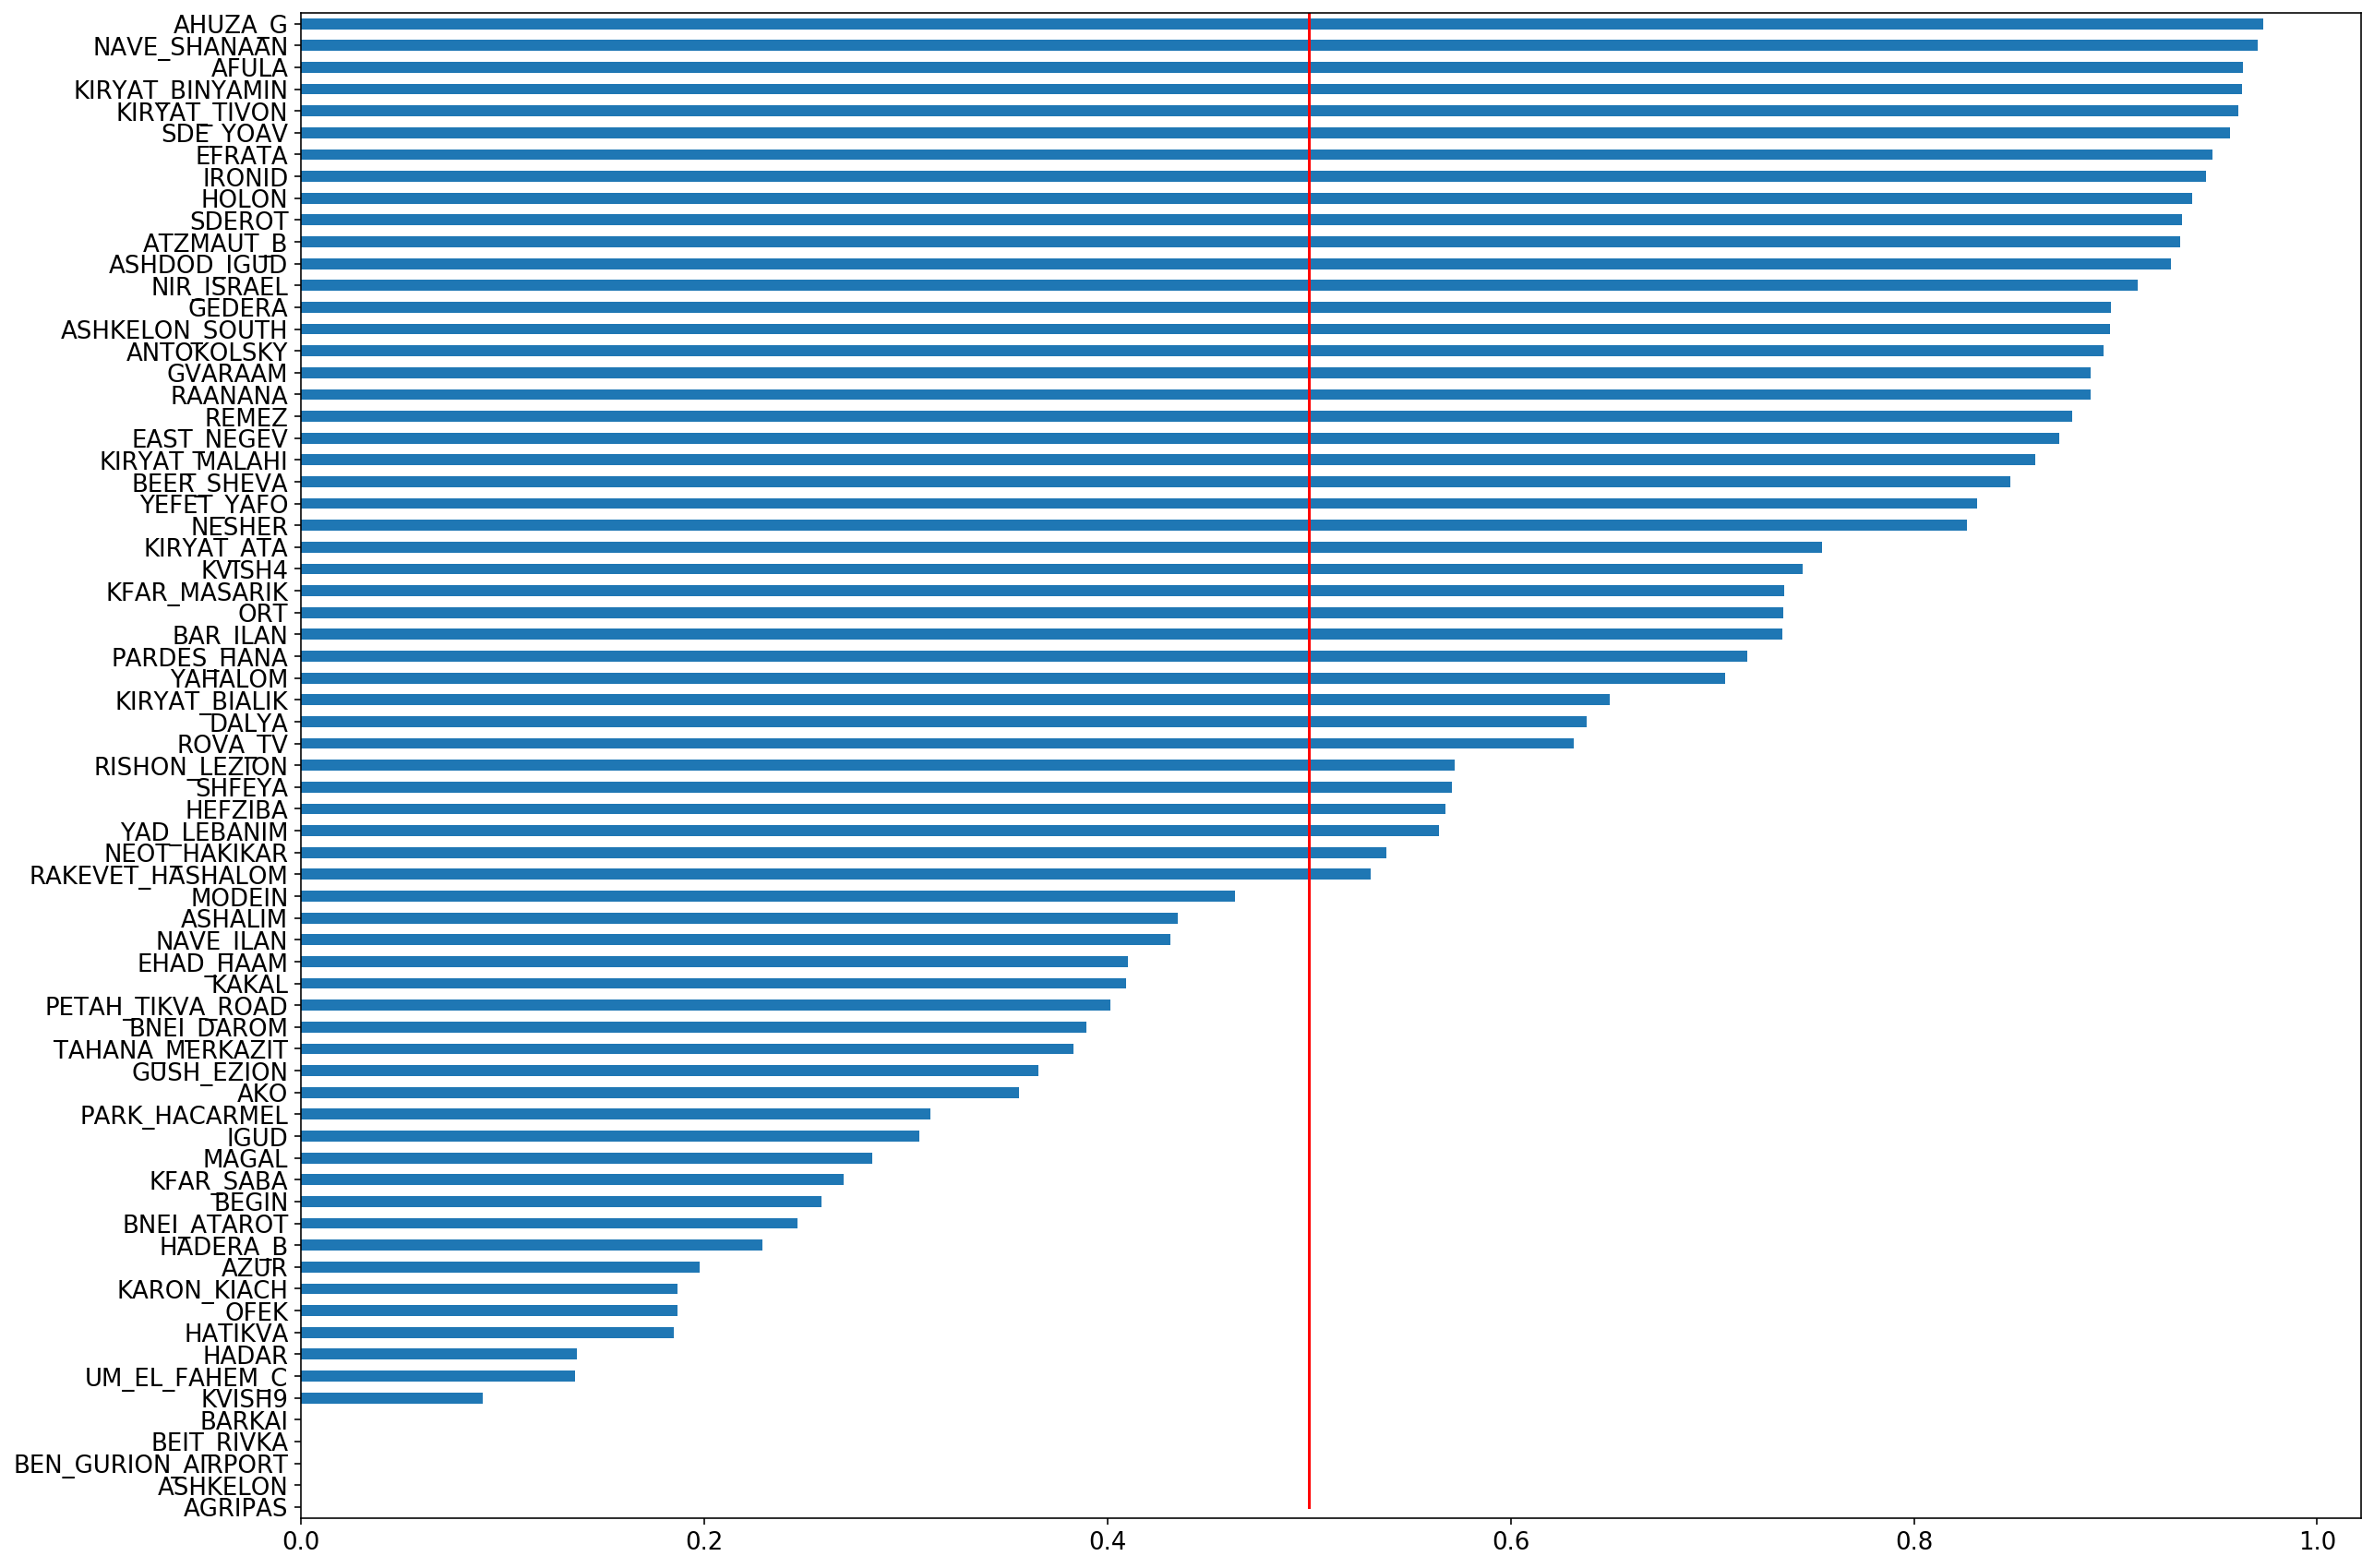

In [751]:
xs.plot(kind='barh',figsize=(20,15),fontsize=13)
plt.plot(np.ones((100,))*0.5,np.arange(0,100,1),'r')
plt.show();

In [752]:
# reduced PM25 
r_PM25 = PM25[start_year:-1] # this is probably on purpose until -1, since the last is always nan
idx = r_PM25.notnull().sum(axis = 0)/r_PM25.shape[0]>0.5
r_PM25 = r_PM25.loc[:, idx]

In [753]:
r_PM25.reset_index(inplace=True)
r_PM25.drop(labels = 'index',axis=1, inplace=True)

In [754]:
r_PM25.tail(5)
# r_PM25.shape

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YAD_LEBANIM,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,HEFZIBA,PARDES_HANA,RAANANA,SHFEYA,NEOT_HAKIKAR
87642,19.4,27.3,27.0,29.8,NaN,81.0,26.0,27.0,14.9,28.4,...,5.1,NaN,18.3,8.3,25.9,NaN,32.5,15.8,16.0,NaN
87643,18.9,26.9,28.9,23.1,NaN,76.3,31.8,21.4,14.8,38.4,...,4.7,NaN,17.3,24.2,21.6,NaN,38.0,33.4,16.0,NaN
87644,26.3,28.5,21.8,28.8,NaN,74.0,30.5,22.5,16.9,40.8,...,7.0,NaN,19.3,14.9,19.4,NaN,37.6,18.6,15.0,NaN
87645,22.7,29.3,24.1,23.1,NaN,55.3,31.1,20.4,18.9,43.6,...,14.3,NaN,23.7,13.3,26.8,NaN,33.0,32.3,15.0,NaN
87646,13.3,27.2,45.0,29.5,NaN,46.0,30.7,28.1,18.2,44.0,...,22.6,NaN,25.4,17.5,21.0,NaN,33.4,49.8,15.0,NaN


In [755]:
r_PM25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87647 entries, 0 to 87646
Data columns (total 40 columns):
AFULA               84436 non-null float64
ANTOKOLSKY          78349 non-null float64
HOLON               82233 non-null float64
IRONID              82825 non-null float64
KVISH4              65299 non-null float64
RAKEVET_HASHALOM    46500 non-null float64
REMEZ               76984 non-null float64
RISHON_LEZION       50147 non-null float64
YAD_LEBANIM         49484 non-null float64
YEFET_YAFO          72878 non-null float64
AHUZA_G             85311 non-null float64
ATZMAUT_B           81711 non-null float64
KIRYAT_ATA          66124 non-null float64
KIRYAT_BIALIK       56874 non-null float64
KIRYAT_BINYAMIN     84370 non-null float64
KIRYAT_TIVON        84212 non-null float64
NAVE_SHANAAN        85051 non-null float64
NESHER              72405 non-null float64
BAR_ILAN            64398 non-null float64
EFRATA              83098 non-null float64
ASHDOD_IGUD         81304 non-n

In [756]:
# change r_PM25 to binary data

In [757]:
r_PM25[r_PM25.notnull()] = 1
r_PM25[r_PM25.isnull()] = 0

In [758]:
r_PM25.tail()

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YAD_LEBANIM,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,HEFZIBA,PARDES_HANA,RAANANA,SHFEYA,NEOT_HAKIKAR
87642,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
87643,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
87644,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
87645,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
87646,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [759]:
diffs = r_PM25.diff(axis = 0)

In [760]:
# diffs.iloc[0:50,0]

In [761]:
diffs.tail()

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YAD_LEBANIM,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,HEFZIBA,PARDES_HANA,RAANANA,SHFEYA,NEOT_HAKIKAR
87642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [762]:
# Only label every 20th value
ticks_to_use = np.arange(0,r_PM25.shape[0]-365*24,366*48)

# Set format of labels (note year not excluded as requested)
labels = [times[i].strftime("%Y") for i in ticks_to_use]

In [763]:
ticks_to_use
labels
r_PM25.shape

array([    0, 17568, 35136, 52704, 70272])

['2014', '2015', '2016', '2017', '2018']

(87647, 40)

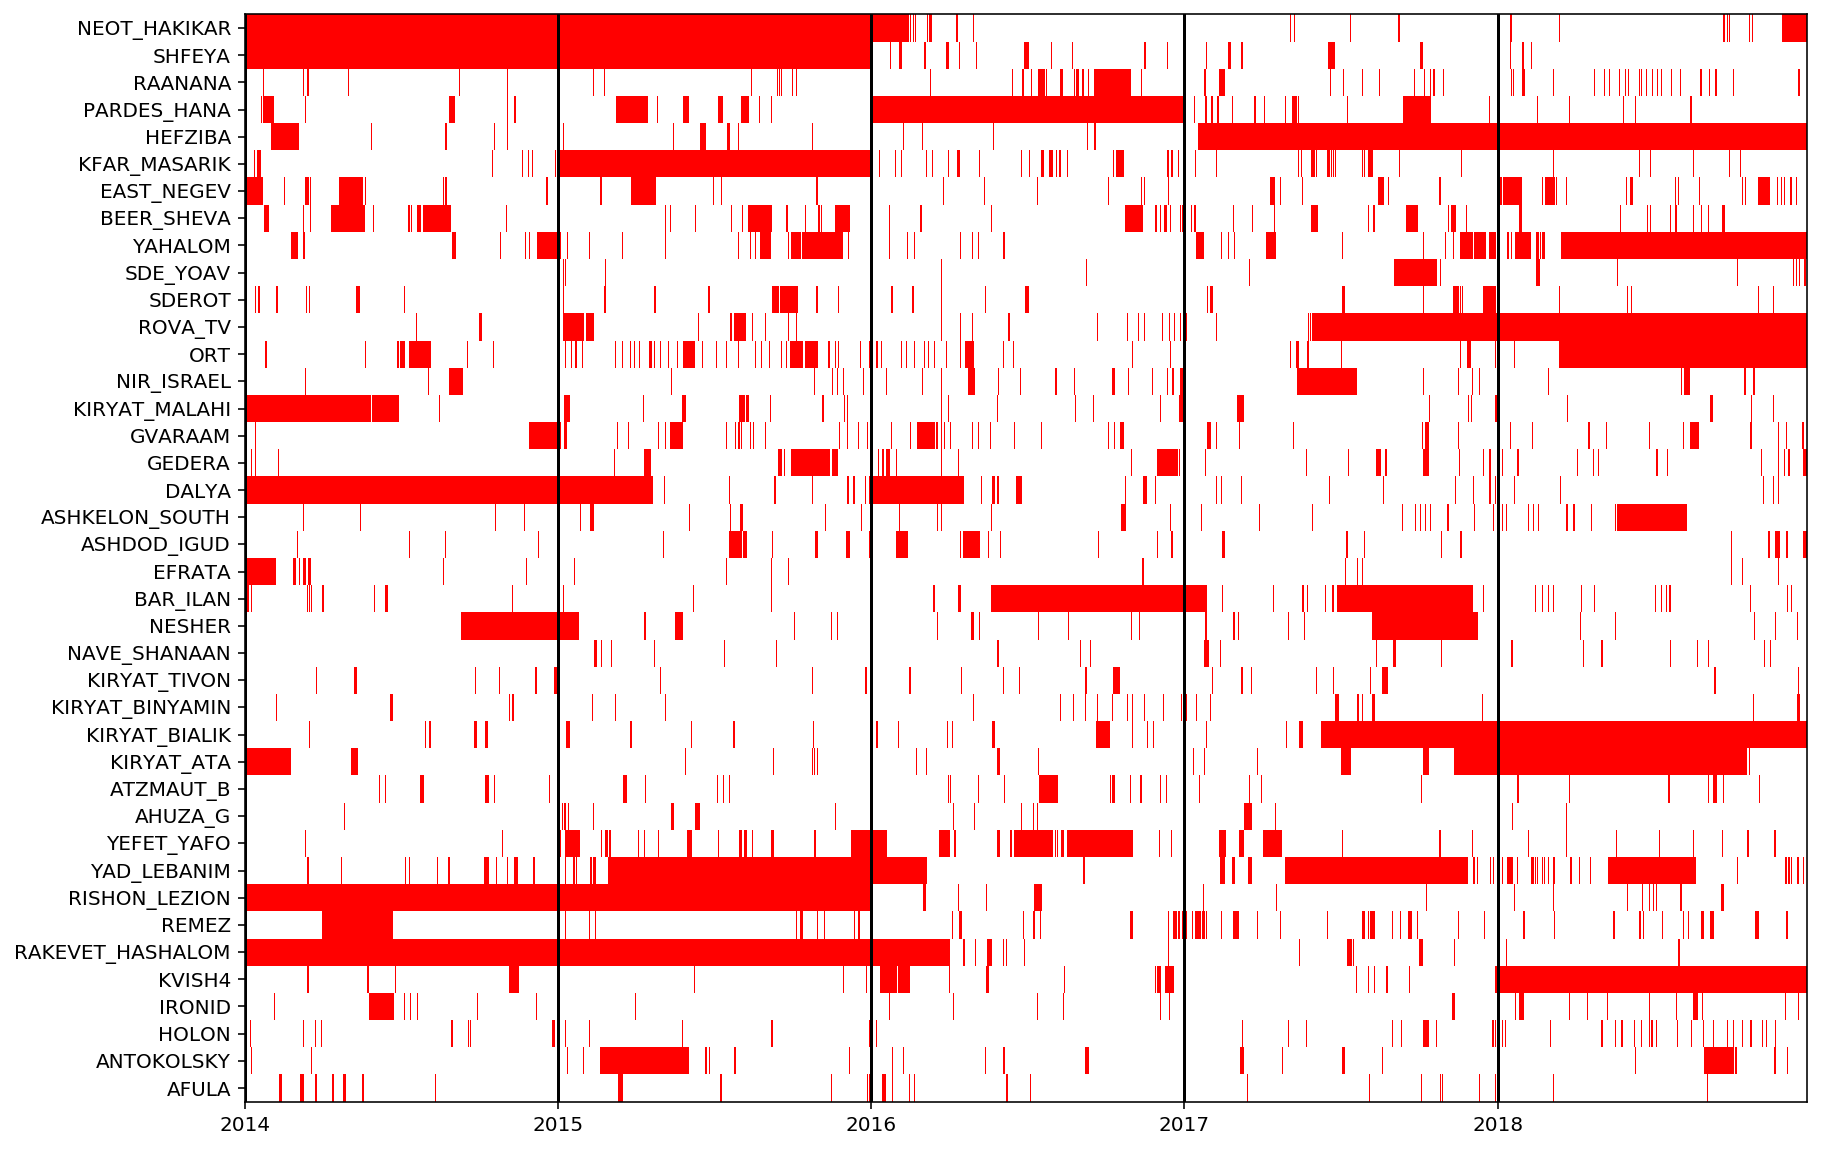

In [764]:
# first row should be manually filled (or ignored)
# -1 is the start of the interval
# 1 is the first where there is no nan (so I need the 1 index before)

missing_interval_lengths = []
fig, ax = plt.subplots(figsize=(14,10))
for monitor in range(r_PM25.shape[1]):
    
    #begining
    if r_PM25.iloc[0,monitor]==0:
        diffs.iloc[0,monitor]=-1
    
    #end
    if r_PM25.iloc[-1,monitor]==0:
        diffs.iloc[-1,monitor]=1

    row_start = np.where(diffs.iloc[:,monitor] == -1)[0]
    # col_start = np.where(diffs == 1)[1]-1

    row_end = np.where(diffs.iloc[:,monitor] == 1)[0]-1
    # col_end = np.where(diffs == -1)[1]

    xranges = list(list(zip(row_start,row_end-row_start)))
    missing_interval_lengths.extend(row_end-row_start)
    yrange = (monitor,1)
    plt.broken_barh(xranges, yrange, facecolors='r');


for t in ticks_to_use:
    plt.plot(np.ones((100,))*t,np.arange(0,r_PM25.shape[1]+0.5,(r_PM25.shape[1]+0.5)/100),'k')
    
plt.xlim((0, r_PM25.shape[0])) 
plt.ylim((0, r_PM25.shape[1]))
plt.yticks(ticks=np.arange(0,r_PM25.shape[1])+0.5,labels=r_PM25.columns)

# Now set the ticks and labels
ax.set_xticks(ticks_to_use)
ax.set_xticklabels(labels)
plt.show();

# What is the distribution of missing station data in each time step?

In [765]:
# reduced PM25 
r_PM25 = PM25[start_year:-1]
idx = r_PM25.notnull().sum(axis = 0)/r_PM25.shape[0]>0.5
r_PM25 = r_PM25.loc[:, idx]

In [766]:
r_PM25.reset_index(inplace=True)
r_PM25.drop(labels = 'index',axis=1, inplace=True)

In [767]:
r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1]

0        0.250
1        0.275
2        0.250
3        0.250
4        0.250
         ...  
87642    0.200
87643    0.200
87644    0.200
87645    0.200
87646    0.200
Length: 87647, dtype: float64

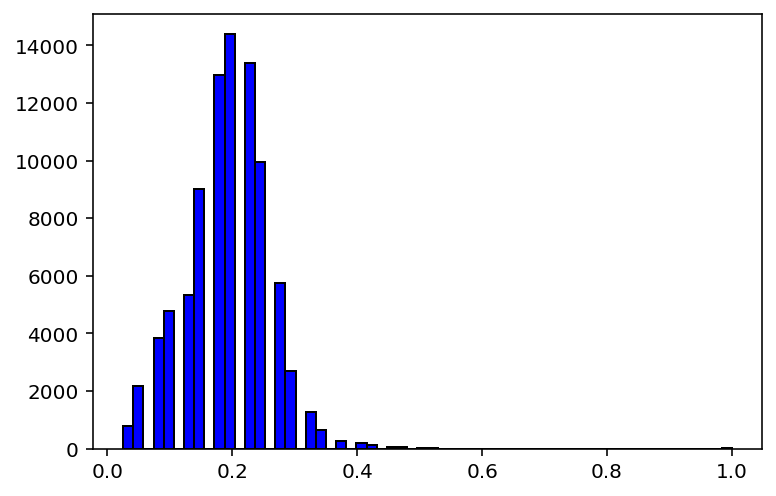

In [768]:
plt.hist(r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1],
         color = 'blue', edgecolor = 'black',bins=60);

In [769]:
np.mean(r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1])

0.19263180713544106

In [770]:
np.median(r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1])

0.2

--> on average, 0.17 of the stations are missing in each time point. 

## plot distribution of missing data interval lengths

In [771]:
# how long are the intervals of missing data?

In [772]:
data = [i*30/60 for i in missing_interval_lengths if i>0]#in hours
_, bins = np.histogram(np.log10(data), bins='auto')
np.max(data)/24 #in days
np.min(data) #in hours


824.5833333333334

0.5

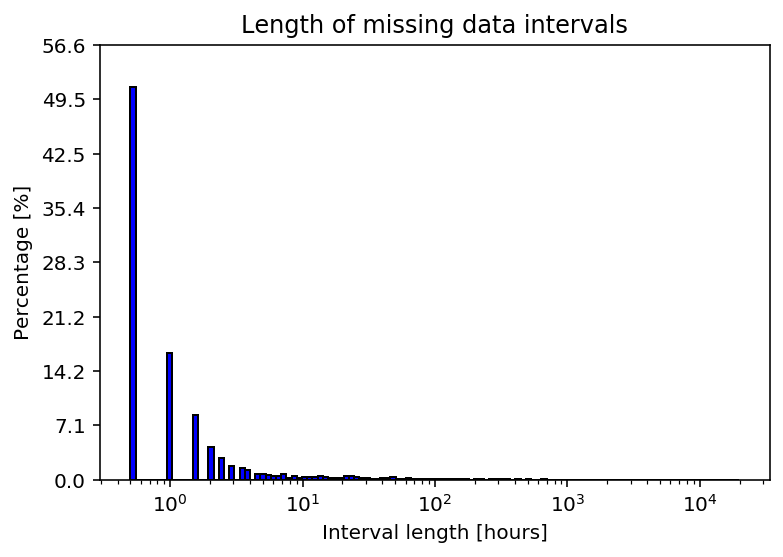

In [773]:
# bins are unequal in width in a way that would make them look equal on a logarithmic scale.
# matplotlib histogram
plt.hist(data, color = 'blue', edgecolor = 'black',bins=10**bins)
plt.gca().set_xscale("log")

plt.title('Length of missing data intervals')
plt.xlabel('Interval length [hours]')
plt.ylabel('Percentage [%]')
plt.yticks(ticks=np.arange(0,9000,1000),labels=np.round(100*np.arange(0,9000,1000)/len(data),1))

# plt.ylim(0,2000)
plt.show();

we can see that the majority of missing intervals are between half an hour to 2-3 hours.

# Look at the data!

### hourly, weekly and monthly averages
12 * 7 * 24

In [774]:
12 * 7 * 24

2016

In [775]:
times.shape
r_PM25.shape

(87647,)

(87647, 40)

In [776]:
times

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:30:00',
               '2014-01-01 01:00:00', '2014-01-01 01:30:00',
               '2014-01-01 02:00:00', '2014-01-01 02:30:00',
               '2014-01-01 03:00:00', '2014-01-01 03:30:00',
               '2014-01-01 04:00:00', '2014-01-01 04:30:00',
               ...
               '2018-12-31 18:30:00', '2018-12-31 19:00:00',
               '2018-12-31 19:30:00', '2018-12-31 20:00:00',
               '2018-12-31 20:30:00', '2018-12-31 21:00:00',
               '2018-12-31 21:30:00', '2018-12-31 22:00:00',
               '2018-12-31 22:30:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=87647, freq='30T')

In [841]:
r_PM25['datetime'] = pd.to_datetime(times)
# r_PM25['week day'] = pd.to_datetime(times).weekday_name
# r_PM25['month'] = pd.to_datetime(times).month
# r_PM25['hour'] = pd.to_datetime(times).hour
r_PM25.drop(['week day','month','hour'],axis=1,inplace=True)

In [842]:
r_PM25.head(2)

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YAD_LEBANIM,YEFET_YAFO,...,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,HEFZIBA,PARDES_HANA,RAANANA,SHFEYA,NEOT_HAKIKAR,datetime
0,27.0,19.7,28.7,33.5,30.1,NaN,47.3,NaN,21.2,31.9,...,9.0,19.6,NaN,29.6,18.2,6.4,30.0,NaN,NaN,2014-01-01 00:00:00
1,26.3,20.9,21.4,38.0,32.9,NaN,41.4,NaN,20.6,28.7,...,18.0,19.8,NaN,36.1,21.3,7.6,35.3,NaN,NaN,2014-01-01 00:30:00


In [843]:
# this can be used for simple imputation:
r_PM25.groupby([r_PM25.datetime.dt.month, r_PM25.datetime.dt.weekday_name, r_PM25.datetime.dt.hour]).mean()

AFULA  ANTOKOLSKY      HOLON     IRONID  \
datetime datetime  datetime                                                
1        Friday    0         30.952273   28.960870  31.934146  28.145455   
                   1         26.615556   31.382609  33.195238  31.388636   
                   2         29.714286   28.006667  32.664286  28.502273   
                   3         27.843478   25.723913  28.816279  29.193333   
                   4         28.752273   26.628261  30.227500  30.243182   
...                                ...         ...        ...        ...   
12       Wednesday 19        24.033333   19.718182  17.659524  20.265854   
                   20        23.078571   20.690909  20.969767  22.311628   
                   21        25.809524   21.563636  22.492857  23.340909   
                   22        27.525000   21.844186  22.547619  25.051163   
                   23        24.507317   20.821951  22.320513  25.064286   

                                KVISH4  RAKEVET_HASHALOM      REMEZ  \
datetime datetime  datetime                                           
1        Friday    0         34.665625         52.768750  39.577500   
                   1         37.309677         39.356250  37.405000   
                   2         34.367742         29.500000  32.379487   
                   3         33.433333         28.368750  34.082927   
                   4         33.877419         25.450000  36.546341   
...                                ...               ...        ...   
12       Wednesday 19        28.830303         84.478261  28.643590   
                   20        28.652941         80.108333  29.756410   
                   21        31.232353         76.008333  30.127500   
                   22        36.212500         63.945833  31.112821   
                   23        34.045455         53.212500  29.333333   

                             RISHON_LEZION  YAD_LEBANIM  YEFET_YAFO  ...  \
datetime datetime  datetime                                          ...   
1        Friday    0             27.225000    25.736364   29.186111  ...   
                   1             32.850000    26.814706   30.461111  ...   
                   2             26.392308    25.496774   31.380556  ...   
                   3             22.365385    24.466667   31.891667  ...   
                   4             27.128000    23.016667   30.113889  ...   
...                                    ...          ...         ...  ...   
12       Wednesday 19            22.643478    19.434375   22.400000  ...   
                   20            21.390909    21.306250   23.072222  ...   
                   21            19.962500    20.178125   22.900000  ...   
                   22            21.030435    19.441935   22.613889  ...   
                   23            22.310000    18.013333   22.297222  ...   

                              SDE_YOAV    YAHALOM  BEER_SHEVA  EAST_NEGEV  \
datetime datetime  datetime                                                 
1        Friday    0         29.591304  47.668421   36.628571   25.735294   
                   1         32.350000  57.178378   37.856818   30.482353   
                   2         38.702174  42.481081   42.258537   30.735294   
                   3         40.306522  34.937838   41.902564   32.276471   
                   4         36.447727  49.359459   37.225000   33.236364   
...                                ...        ...         ...         ...   
12       Wednesday 19        14.209091  18.836364   18.026316   14.287179   
                   20        13.829545  19.140909   18.782500   14.467500   
                   21        15.938636  18.480952   20.746154   15.277500   
                   22        15.295455  23.409091   22.251351   16.978049   
                   23        15.588372  22.357895   21.745000   16.163158   

                             KFAR_MASARIK    HEFZIBA  PARDES_HANA    RAANANA  \
datetime datetime  datetime                      

### plot interactive boxplots of values per hour (hourly averages dist.,n=no.years*52*24), per day of week (dayly averages dist., n=no.years*52), per month (monthly averages dist., n=no.years)

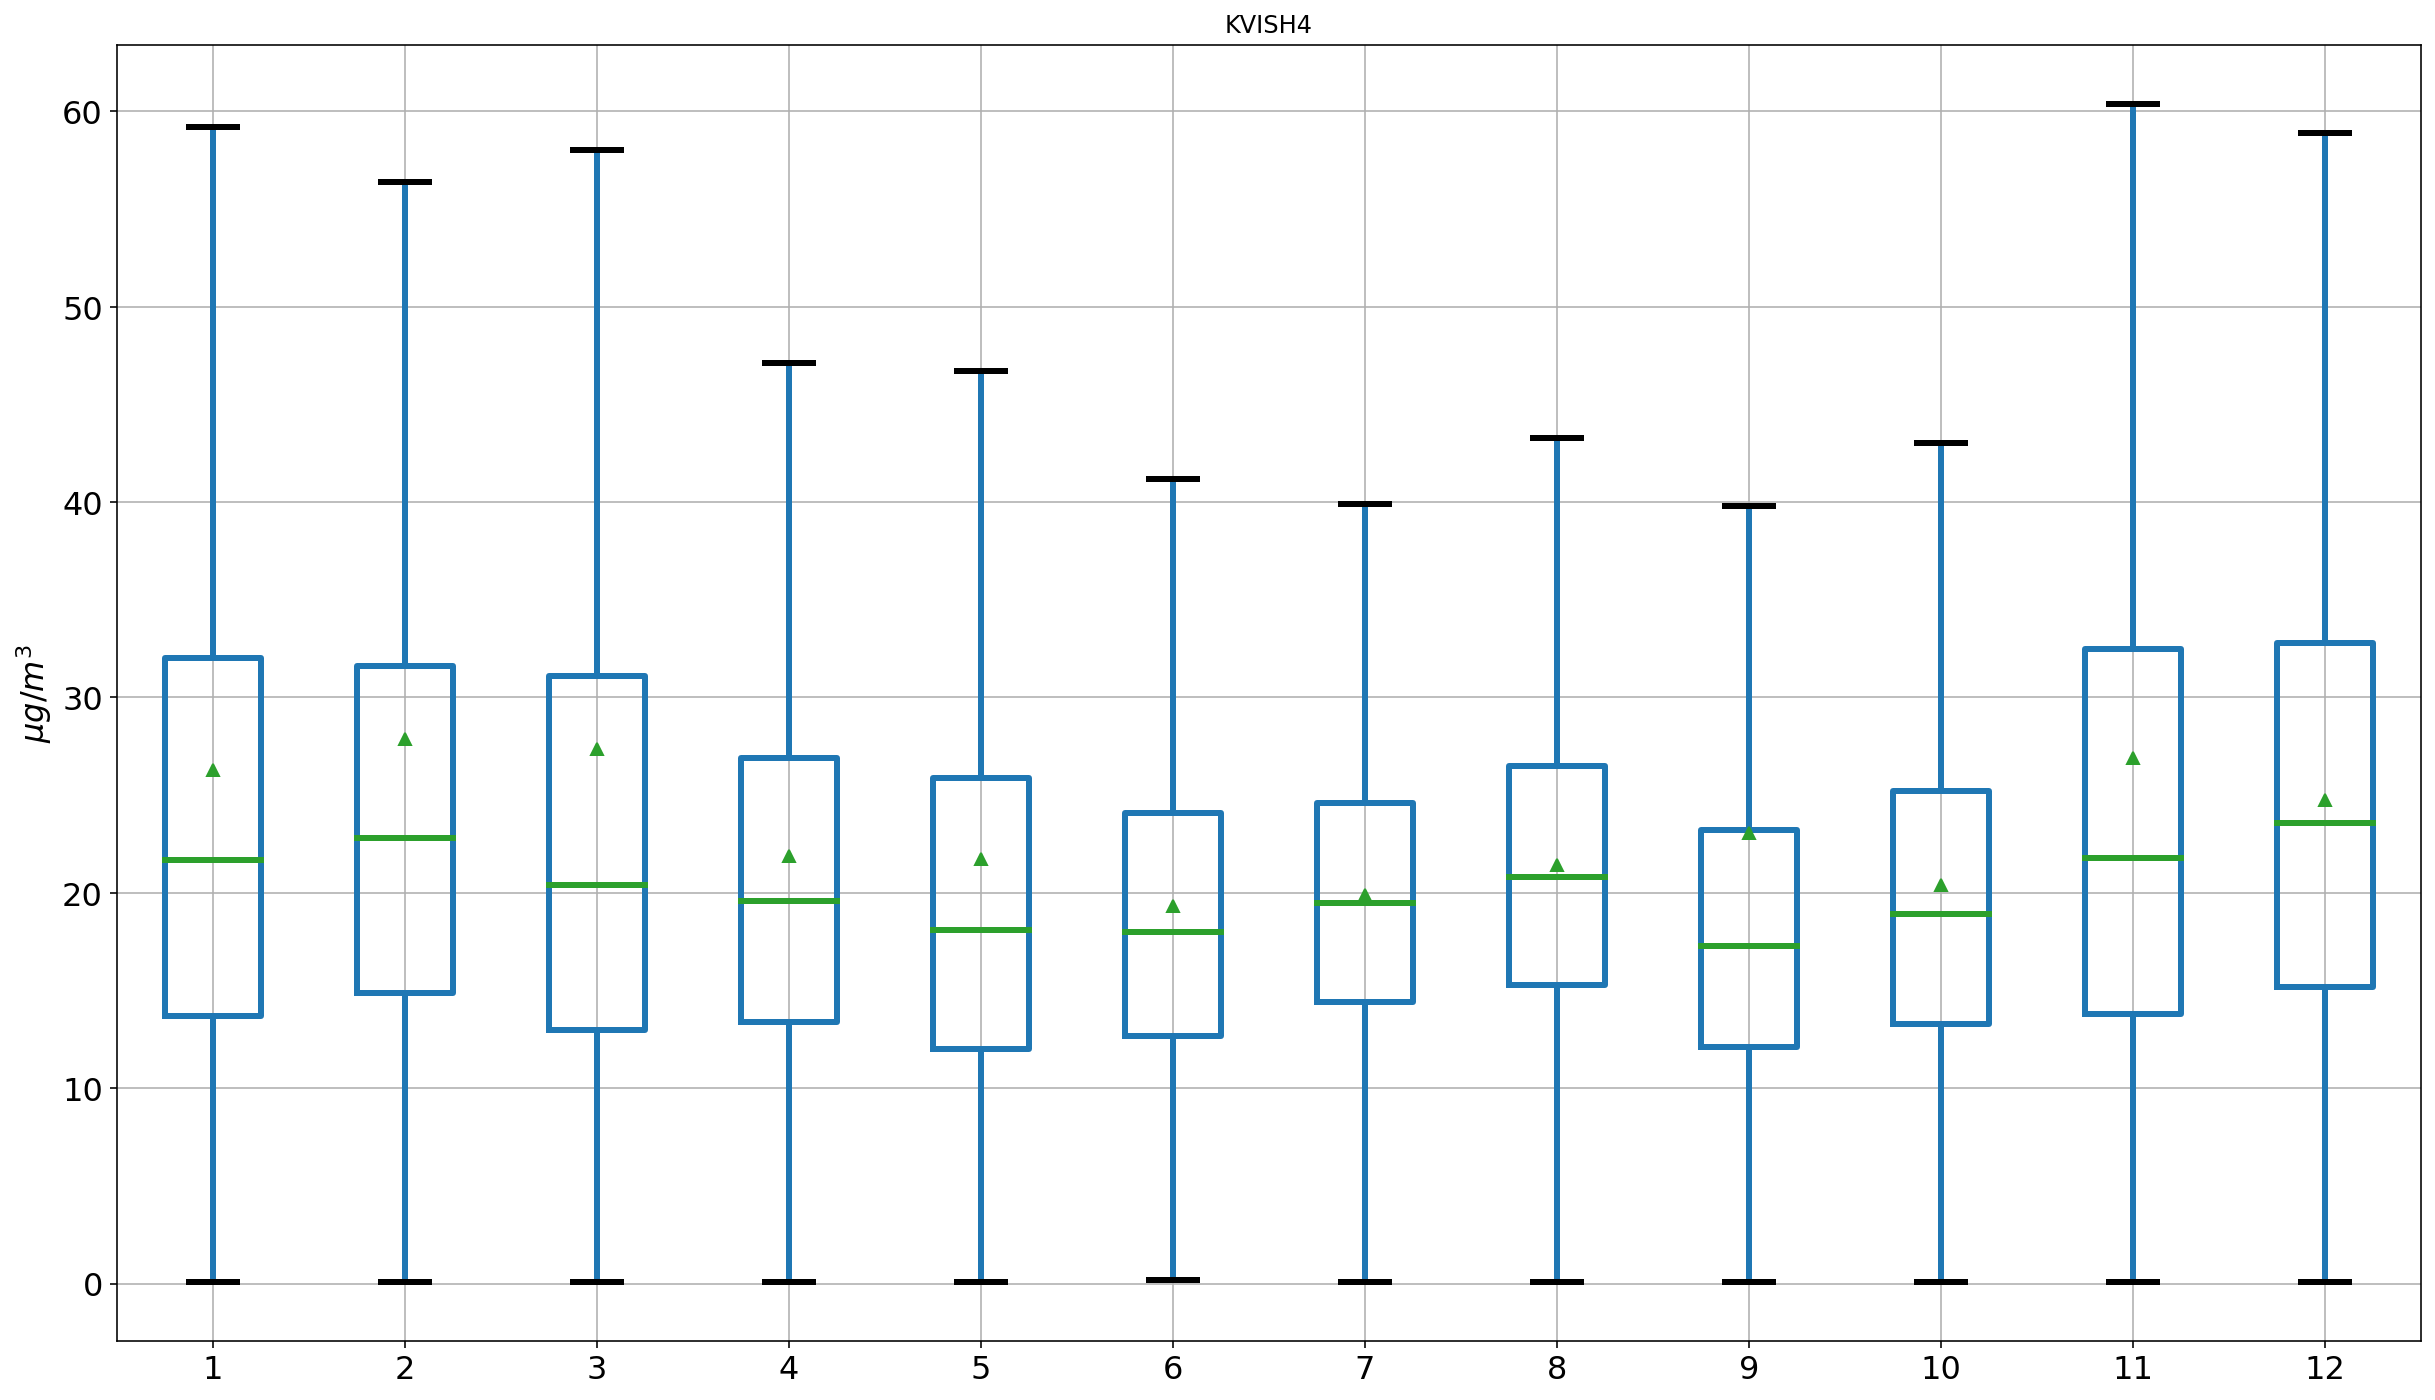

In [844]:
fig, ax = plt.subplots(figsize=(20,12))

bp = r_PM25.boxplot(column=['KVISH4'], by=r_PM25.datetime.dt.month, ax=ax, fontsize=16,
                    showfliers=False, showmeans=True,return_type='dict')

[[item.set_linewidth(3) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['means']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['caps']] for key in bp.keys()]

# title_boxplot = 'awesome title'
# plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
# plt.ylim([0,40])
ax.set_xlabel('')
ax.set_ylabel('$\mu g/m^3$',fontsize=16)
plt.show();

In [949]:
# chosen_data = r_PM25.groupby([r_PM25.datetime.dt.weekday_name]).mean()

# cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# chosen_data = chosen_data.set_index(chosen_data.index).reindex(cats).reset_index()

# chosen_data

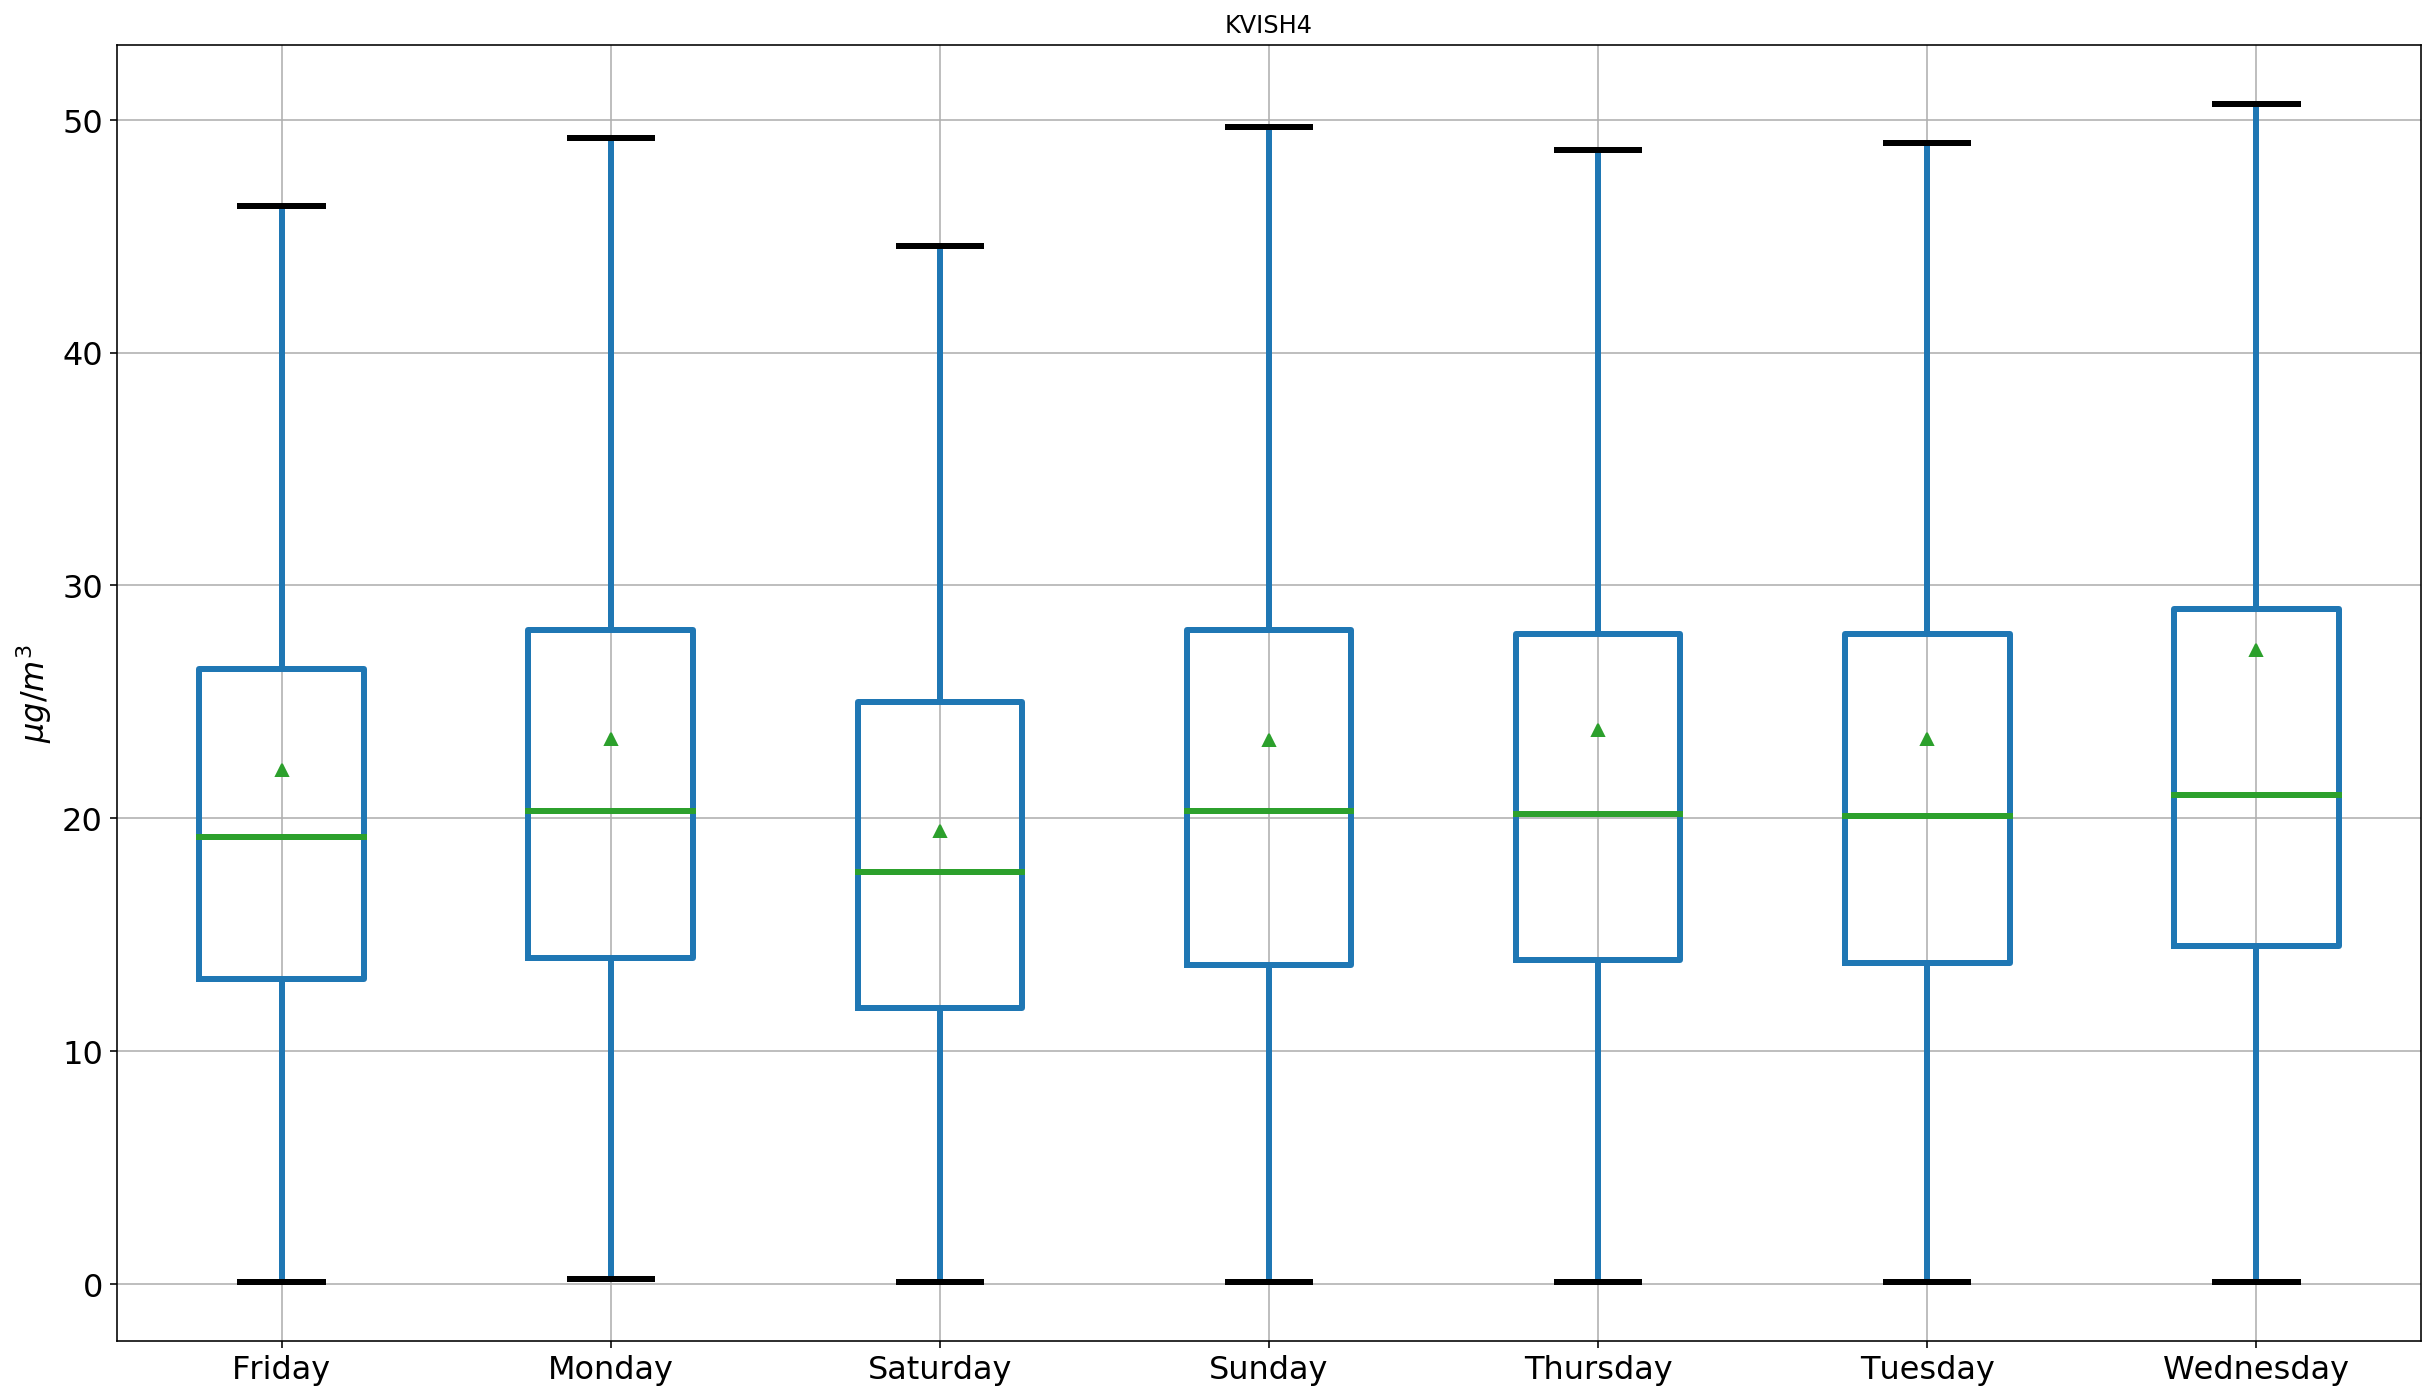

In [845]:
fig, ax = plt.subplots(figsize=(20,12))

  
bp = r_PM25.boxplot(column=['KVISH4'], by=r_PM25.datetime.dt.weekday_name, ax=ax, fontsize=16,
                    showfliers=False, showmeans=True,return_type='dict')

[[item.set_linewidth(3) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['means']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['caps']] for key in bp.keys()]

# title_boxplot = 'awesome title'
# plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
# plt.ylim([0,40])
ax.set_xlabel('')
ax.set_ylabel('$\mu g/m^3$',fontsize=16)
plt.show();

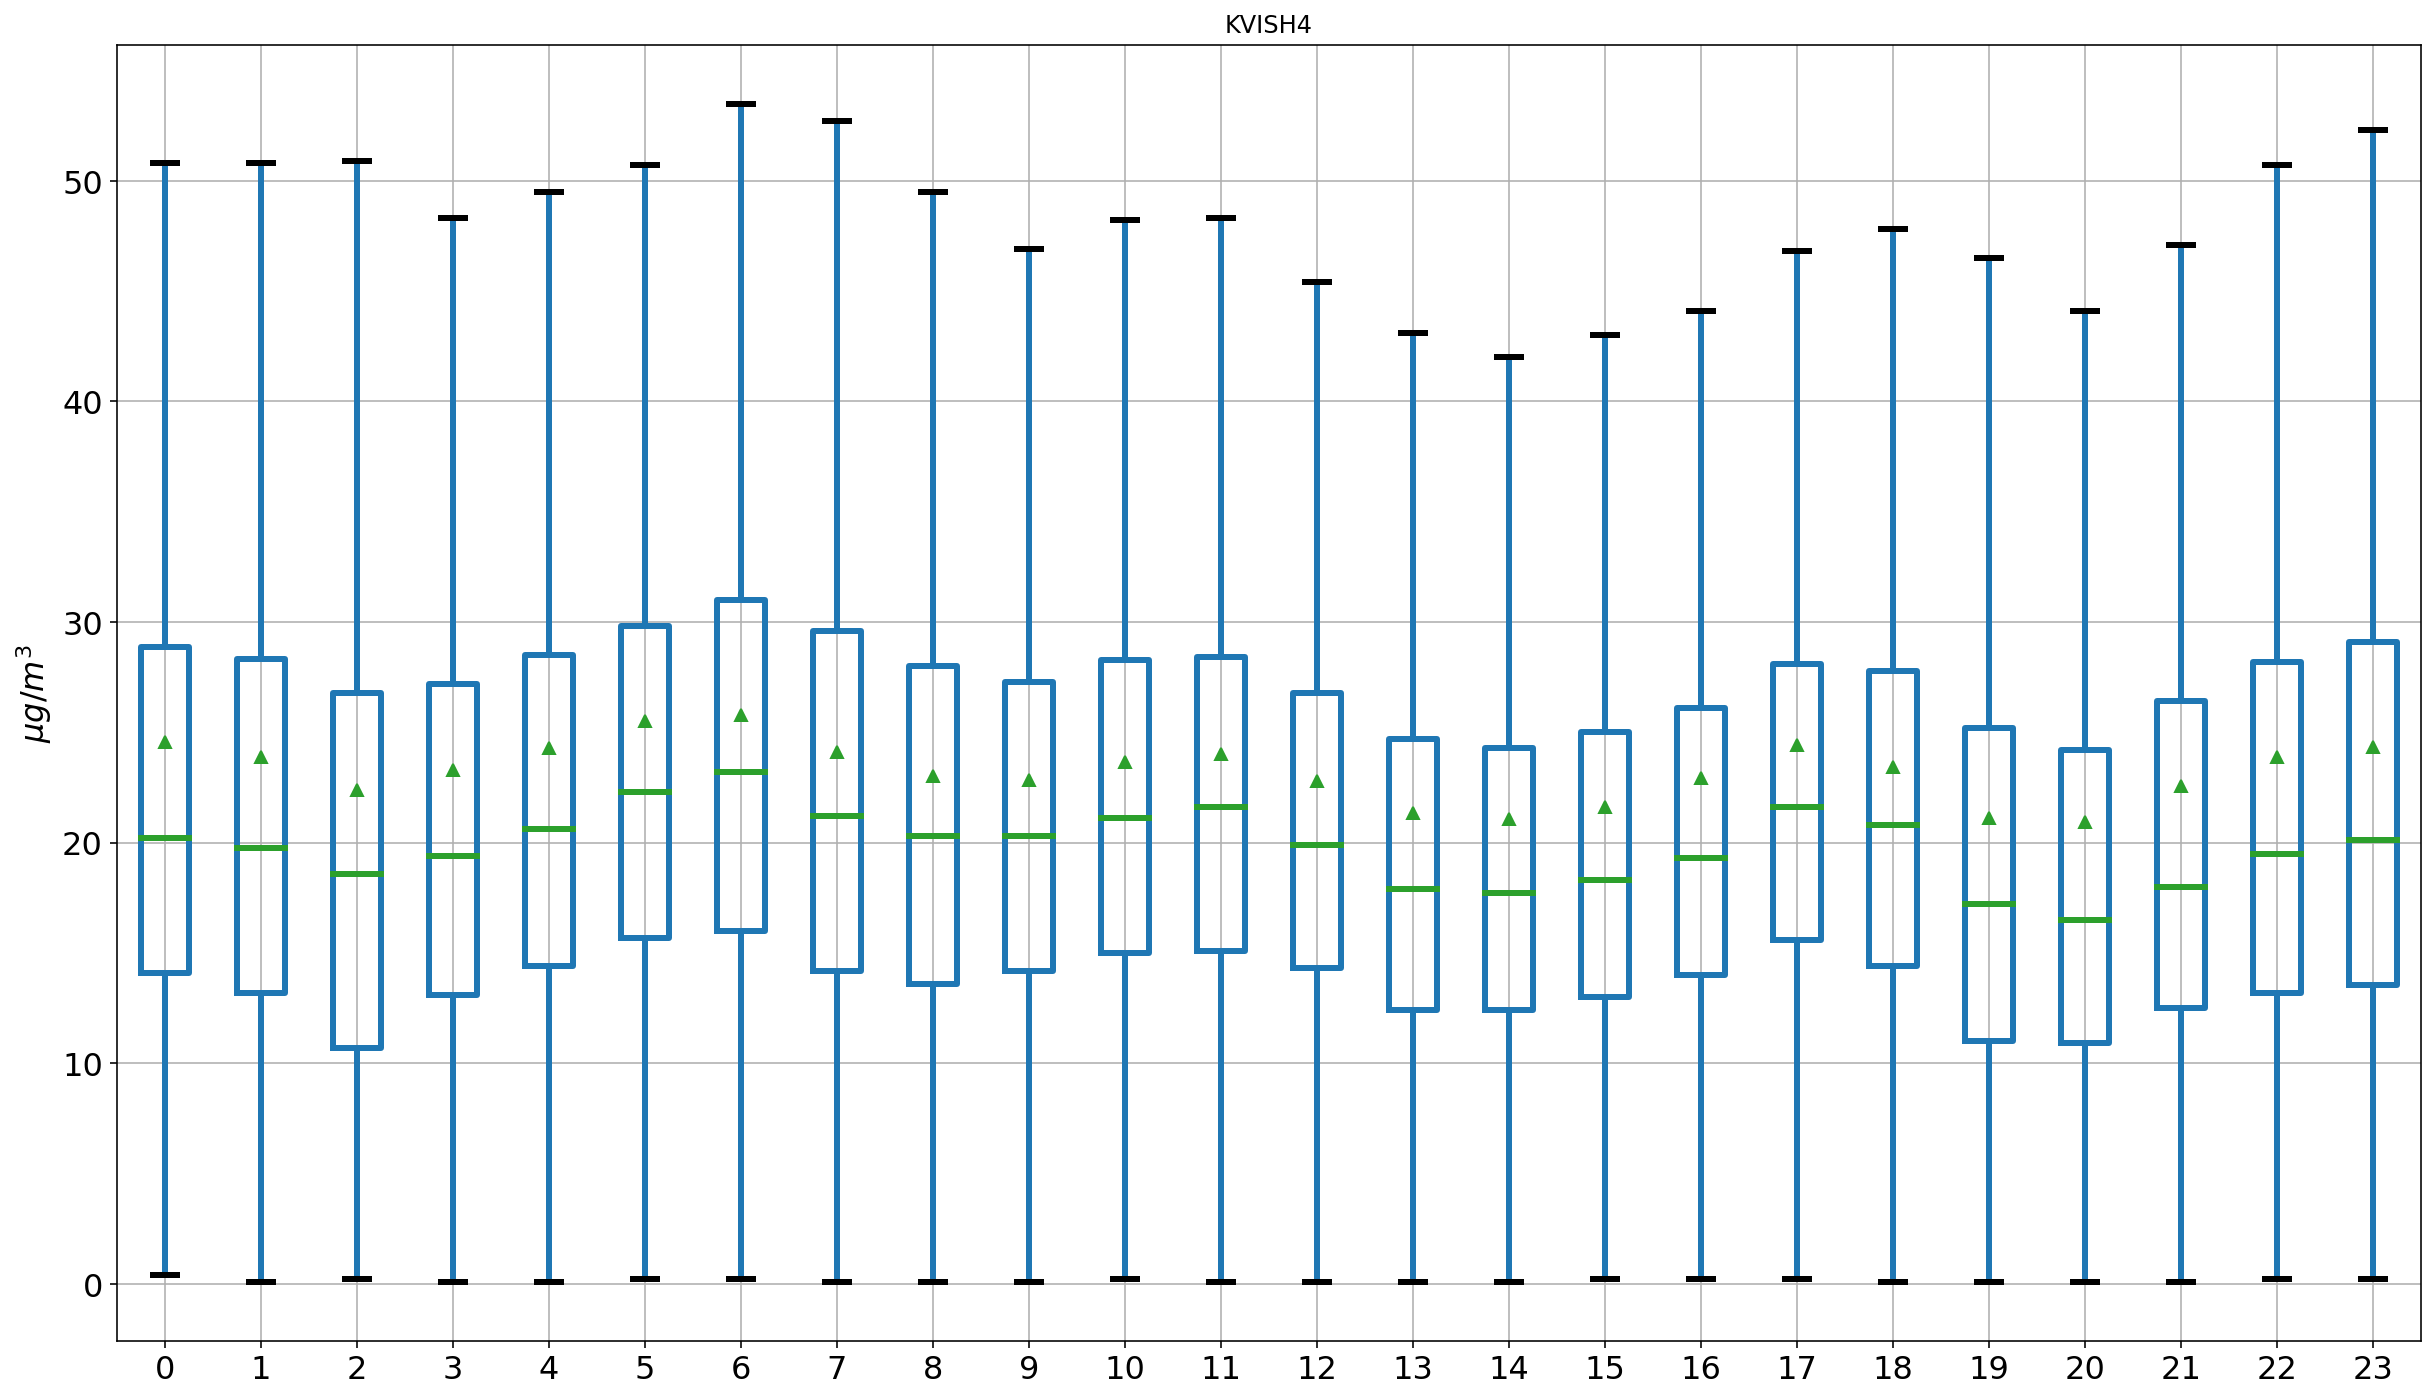

In [846]:
fig, ax = plt.subplots(figsize=(20,12))

bp = r_PM25.boxplot(column=['KVISH4'], by=r_PM25.datetime.dt.hour, ax=ax, fontsize=16,
                    showfliers=False, showmeans=True,return_type='dict')

[[item.set_linewidth(3) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['means']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['caps']] for key in bp.keys()]

# title_boxplot = 'awesome title'
# plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
# plt.ylim([0,40])
ax.set_xlabel('')
ax.set_ylabel('$\mu g/m^3$',fontsize=16)
plt.show();

In [894]:
import random

number_of_colors = r_PM25.shape[1]

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#3B7F04', '#34D8D0', '#DBE137', '#677F70', '#783E33', '#514052', '#A4F825', '#1C94B2', '#188DE2', '#95CC08', '#F45FAD', '#3834CD', '#A1D7BF', '#82E625', '#02DAE6', '#2AD77F', '#D076DE', '#D2A739', '#6A4304', '#161680', '#232F15', '#092373', '#7C6E9B', '#DA69F6', '#83194F', '#F5E279', '#6491D1', '#1E8B81', '#64929B', '#F1598E', '#0BBE7B', '#7FD916', '#E9939C', '#430466', '#BEFCFE', '#5916D3', '#F7EEB7', '#65D5CE', '#80BB7B', '#C99219', '#C5FF64']


In [939]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [895]:
# set extra colors in case more pollutants are measured in a station:
# colors = ['#FFD700','firebrick','LightSkyBlue','#8B008B','blue','turquoise','DarkSlateGrey','fuchsia','#8B4513','#2ca02c','#ff7f0e','#BC8F8F']

color_lines = dict()
for col, c in zip(r_PM25.columns, colors[0:len(r_PM25.columns)+1]):
    color_lines[col] = c

In [948]:
layout = go.Layout(
    title={
        'text': "Choose a station and averaging time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'right',
        'yanchor': 'top'},
    yaxis = dict(
        title = '$\mu g/m^3 or ppb$ '
    ),
    xaxis = dict(
        title = 'Averging period'
    ),
    plot_bgcolor='rgb(255,255,250)'
#     paper_bgcolor = 'rgba(0,0,0,0)',
#     plot_bgcolor = 'rgba(0,0,0,0)'
)

def update_plot(avg,Stations):   
#     avg = month, weekday_name,hour
#     data = [] #empty list where all my traces are in
    fig = go.Figure(layout=layout)
    
    for s in Stations: # signals are the items in the multiselect widget
        
        chosen_data = r_PM25.groupby([r_PM25.datetime.apply(lambda x : getattr(x, avg))]).mean()  
        
        if avg == 'weekday_name':
            chosen_data = chosen_data.set_index(chosen_data.index).reindex(cats).reset_index()

        # updaing averages
        fig.add_trace(go.Scatter(
            x=chosen_data.datetime,
            y=chosen_data[s],
            mode = 'lines',#lines/markers
            name = '{}\n{} average'.format(s,avg),
            line = dict(width=2,color=color_lines[s]),
            showlegend = True
        ))   
        
    py.offline.iplot(fig) # when using notebook

i = widgets.interact(update_plot,
             avg = widgets.RadioButtons(options=list(['month', 'weekday_name', 'hour']),value=('weekday_name'),description='Averaging time'), 
             Stations = widgets.SelectMultiple(options=list(r_PM25.columns[:-1]),value=('KVISH4','AFULA'))
             )


interactive(children=(RadioButtons(description='Averaging time', index=1, options=('month', 'weekday_name', 'hour'), value='weekday_name'), SelectMultiple(description='Stations', index=(4, 0), options=('AFULA', 'ANTOKOLSKY', 'HOLON', 'IRONID', 'KVISH4', 'RAKEVET_HASHALOM', 'REMEZ', 'RISHON_LEZION', 'YAD_LEBANIM', 'YEFET_YAFO', 'AHUZA_G', 'ATZMAUT_B', 'KIRYAT_ATA', 'KIRYAT_BIALIK', 'KIRYAT_BINYAMIN', 'KIRYAT_TIVON', 'NAVE_SHANAAN', 'NESHER', 'BAR_ILAN', 'EFRATA', 'ASHDOD_IGUD', 'ASHKELON_SOUTH', 'DALYA', 'GEDERA', 'GVARAAM', 'KIRYAT_MALAHI', 'NIR_ISRAEL', 'ORT', 'ROVA_TV', 'SDEROT', 'SDE_YOAV', 'YAHALOM', 'BEER_SHEVA', 'EAST_NEGEV', 'KFAR_MASARIK', 'HEFZIBA', 'PARDES_HANA', 'RAANANA', 'SHFEYA', 'NEOT_HAKIKAR'), value=('KVISH4', 'AFULA')), Output()), _dom_classes=('widget-interact',))

### interactively! - plain data (to spot outliers), and moving average - weekly, monthly,  per station...

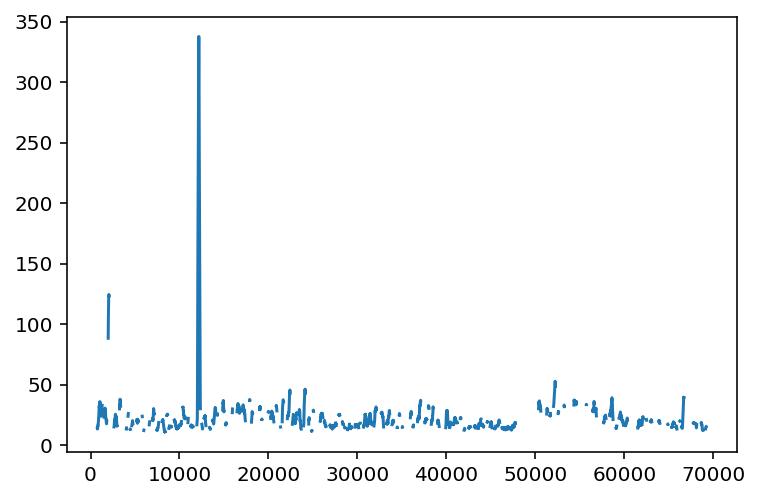

In [447]:
plt.plot(r_PM25.iloc[:,0].rolling(window=(24*7),min_periods=24*7).mean()) #weekly

## Check verious methods for data imputation

In [308]:
# https://towardsdatascience.com/facing-the-arima-model-against-neural-networks-745ba5a933ca
# https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8
# https://towardsdatascience.com/forecasting-with-prophet-d50bbfe95f91
# https://medium.com/@drnesr/filling-gaps-of-a-time-series-using-python-d4bfddd8c460
# https://github.com/KlickInc/datasci-strata-talk-missing-data/blob/master/Strata%20Data%20Conference%20New%20York%202019_FINAL.pdf
# https://stackoverflow.com/questions/57419021/filling-huge-large-chunks-of-time-series-data
# looks good - 
# https://medium.com/analytics-vidhya/using-scikit-learns-iterative-imputer-694c3cca34de

# libraries
# https://pypi.org/project/fancyimpute/
# looks the most interesting - 
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

# examples
# https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
# https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

In [309]:
# Data-driven methods (using TIME-SERIES FORCASTING). 
# sometimes called univariate imputation: "One type of imputation algorithm is
# univariate, which imputes values in the i-th feature dimension using only non-missing
# values in that feature dimension (e.g. impute.SimpleImputer)."

# By contrast, multivariate imputation algorithms use the entire set of available 
# feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).

# ARIMA - takes into consideration...? 
# Prophet - takes into cosideration seasonality and trend
# LSTM (ANN?)

# interpolation-like (data-driven)
# EM-?
# KNN-?
# moving average (rolling)
# mean (simple imputer or fillna pandas)

# Regression (maybe called multivariate imputation?)
# forcast by the values in other stations.
# Random forest for example

# Clustering - take the hour of the day, and the day of the year and cluster to groups. 
# then maybe give the average value where is it missing according to the group. ?

# Evaluation matrics - MAE, RMSE, R^2, rank product = geometric mean of the all evaluation values
# compare to random
# ensamble - take mean value(?) of top performing methods. 

In [310]:
# SUMMARY

# long periods (over several hours) - univariate-ARIMA, Prophet, LSTM,  multivariate-regression like (sklearn)
# problem might arrise with the long missing period *at the begining* of time (before station started to operate). 
# for this maybe only the multivariate is appropriate. Not sure. 
# short periods - everything is good... 
# Evaluation matrics - MAE, RMSE, R^2, rank product = geometric mean of the all evaluation values
# compare to random
# ensamble - take mean value(?) of top performing methods. 
# uncertainty - "IterativeImputer can also be used for multiple imputations by 
# applying it repeatedly to the same dataset with different random seeds when 
# sample_posterior=True."

# understanding - 
# I need to take from each time-series of each station, the non-missing data I have. 
# I NEED TO MAKE SURE MY DATA IS NORMALLY DISTRIBUTED. MIGHT BE JUST DUE TO THE SIZE OF THE DATASET...
# then, I need to randomly take chunks of data and report it as missing 
# (based on the distribution of missing interval sizes?)- 
# technically I can randomly choose X time points (from a poisson dist. or - the distance between start of missing intervals is exp. dist.)
# and then randomly choose interval length. however, I might have a problem with overlapping. 
# one solution - interate until I don't have an overlap. 
# other solution - both missing intervals and data intervals are geometric dist.
# write a function that randomly builds simultanously the missing and non-missing. 
# (based on the probability of that station to be missing?)
# I should probably assign for each station the size of missing chunks based on 
# the real size of missing chunks of that station - NOT SURE IT MATTERS.
# I then train all kinds of models (regression (multivariate) or univariate) 
# and evaluate their performance based on predicting the dummy missing values.
# I can do 10 fold cross-validation. 
# I think it must also predict the real missing values simultanously, but the 
# evaluation would be based only on the dummy ones of course. 
# I should try and add the day in the year, the day in the week and time of day as features.


# Multivariate-regression like (sklearn)

In [311]:
# start with trying to impute missing values in one station based on other stations
# later possibly add meteorological data 
# 105167 entries, each with 35 features. 

In [312]:
# IterativeImputer - Iterative imputation of the missing values.
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

'''This uses round-robin linear regression, modeling each feature with missing 
values as a function of other features, in turn. The version implemented assumes 
Gaussian (output) variables. If your features are obviously non-normal, consider 
transforming them to look more normal to potentially improve performance.'''

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import MissingIndicator

'This uses round-robin linear regression, modeling each feature with missing \nvalues as a function of other features, in turn. The version implemented assumes \nGaussian (output) variables. If your features are obviously non-normal, consider \ntransforming them to look more normal to potentially improve performance.'

In [313]:
# reduced PM25 - starting later than 2000 at the moment...
r_PM25 = PM25[start_year:-1]
idx = r_PM25.notnull().sum(axis = 0)/r_PM25.shape[0]>0.5
r_PM25 = r_PM25.loc[:, idx]

In [314]:
r_PM25.reset_index(inplace=True)
r_PM25.drop(labels = 'index',axis=1, inplace=True)
r_PM25.drop(labels = 'datetime',axis=1, inplace=True)

In [315]:
r_PM25.head(5)
r_PM25.shape

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,46.7,41.3,NaN,39.6,39.0,49.4,NaN,41.8,NaN,41.4,...,36.7,NaN,36.5,7.6,NaN,33.8,47.5,NaN,NaN,NaN
1,43.2,40.6,NaN,35.6,39.5,47.9,NaN,43.3,NaN,39.5,...,18.6,NaN,34.8,7.8,NaN,22.2,44.5,NaN,NaN,NaN
2,37.3,41.7,NaN,38.8,40.7,37.7,NaN,43.6,NaN,38.3,...,16.5,NaN,35.6,15.0,NaN,23.6,47.9,NaN,NaN,NaN
3,41.8,40.6,NaN,34.9,42.2,45.5,NaN,47.8,NaN,39.1,...,27.4,NaN,37.7,14.2,NaN,21.4,45.8,NaN,NaN,NaN
4,45.6,43.2,NaN,43.5,48.2,51.7,NaN,44.8,NaN,40.0,...,24.9,NaN,34.8,11.6,NaN,20.2,47.4,NaN,NaN,NaN


(70127, 41)

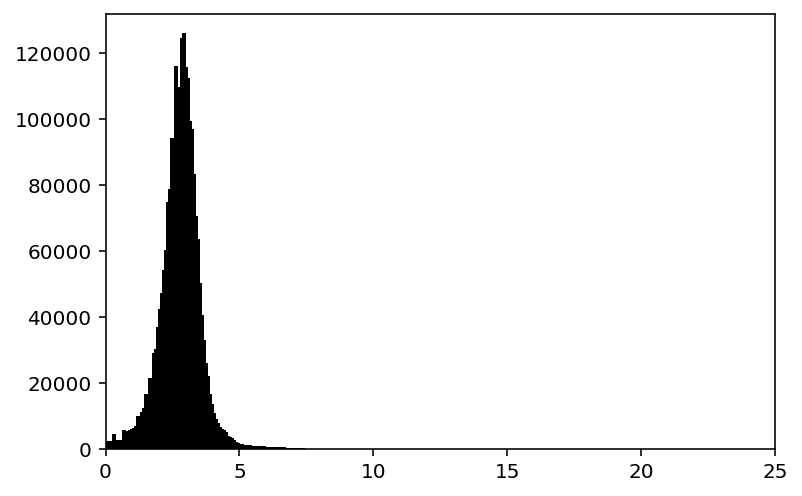

In [316]:
# check for Normality
# https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
check = r_PM25.values
check = check[(~np.isnan(check))]+0.0000000000001 # because of the zeros

plt.hist(np.log(check),color = 'blue', edgecolor = 'black',bins=500)
plt.xlim([0,25])
plt.show();

looks like the data is log-normally distributed

In [317]:
# perform a box-cox transformation for the data to obtain normally-distributed features. 

In [318]:
from sklearn.preprocessing import PowerTransformer

In [319]:
# change X_missing to normal_data
pt = PowerTransformer(method='box-cox')
t_data = r_PM25.values+1
pt.fit(t_data)

normal_data = pd.DataFrame(
    pt.transform(t_data),
    index=r_PM25.index,
    columns=r_PM25.columns)

PowerTransformer(method='box-cox')

In [320]:
normal_data.head()

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,1.685925,1.610978,NaN,1.315126,1.347892,1.530534,NaN,1.228884,NaN,1.404030,...,1.221014,NaN,1.309028,-1.003674,NaN,0.921187,1.618426,NaN,NaN,NaN
1,1.556205,1.583261,NaN,1.144117,1.368420,1.477862,NaN,1.283811,NaN,1.314047,...,0.318468,NaN,1.233619,-0.968403,NaN,0.161022,1.501521,NaN,NaN,NaN
2,1.313657,1.626586,NaN,1.282130,1.416765,1.073871,NaN,1.294579,NaN,1.254892,...,0.171666,NaN,1.269528,-0.045240,NaN,0.269233,1.633583,NaN,NaN,NaN
3,1.501564,1.583261,NaN,1.112540,1.475449,1.390382,NaN,1.438361,NaN,1.294537,...,0.818307,NaN,1.360290,-0.124897,NaN,0.096478,1.552897,NaN,NaN,NaN
4,1.646158,1.683687,NaN,1.468346,1.693070,1.608537,NaN,1.336959,NaN,1.338152,...,0.691274,NaN,1.233619,-0.415511,NaN,-0.004401,1.614621,NaN,NaN,NaN


In [321]:
# inverse_normal_data = pd.DataFrame(
#     pt.inverse_transform(normal_data.values)-0.0000000000001,
#     index=normal_data.index,
#     columns=normal_data.columns)


# inverse_normal_data.head(1)

In [322]:
# mask all missing values
indicator = MissingIndicator(missing_values=np.nan)
mask_missing_values_original = indicator.fit_transform(normal_data)
mask_missing_values_original
mask_missing_values_original.shape

array([[False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True]])

(70127, 41)

In [323]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [324]:
rng = np.random.RandomState(0)

In [325]:
def generate_missing_values_for_all_stations(PM25,per):
    # per is the percentage of missing values per 1 station, later would be a vector
    # of percentages. 
    # n_features is the number of stations
    n_samples, n_features = PM25.shape
    X_missing = PM25.copy()
    
    # Add missing values in per% of the lines (a line is 1 station, all timesteps)
    # this is just the average, maybe later I should do it seperately for each station
    missing_rate = per
    
    for f in range(n_features): # for each station       
        n_missing_samples = int(n_samples * missing_rate)
        missing_samples = np.zeros(n_samples, dtype=np.bool)
        missing_samples[: n_missing_samples] = True
        rng.shuffle(missing_samples)
        X_missing.iloc[missing_samples,f] = np.nan
    
    return X_missing

In [326]:
X_missing = generate_missing_values_for_all_stations(normal_data,0.2)

In [327]:
mask_missing_values_all = indicator.fit_transform(X_missing)
mask_missing_values_all
mask_missing_values_all.shape

array([[False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

(70127, 41)

In [328]:
# true = nan
a = mask_missing_values_original # here I want false = not nan
b = mask_missing_values_all # here I want true = nan

In [329]:
(~a) & (b)
~a
b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

array([[ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True, False, False]])

array([[False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [330]:
# y missing should be the diff between the original missing and the new generated missing
mask = ((~a) & (b))
y_missing = normal_data.mask(~mask)# for validation 

In [331]:
# percentage for validation from a complete dataset
(np.sum(np.sum(~y_missing.isnull())))/(105167*35)

# percentage for validation from the non-missing data
(np.sum(np.sum(~y_missing.isnull())))/(np.sum(np.sum(~mask_missing_values_original)))

0.12586620735184448

0.19989791396727638

In [332]:
y_missing.head(1)

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,NaN,NaN,NaN,NaN,NaN,1.530534,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
X_missing.head(1)

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,1.685925,1.610978,NaN,1.315126,1.347892,NaN,NaN,1.228884,NaN,1.40403,...,1.221014,NaN,1.309028,-1.003674,NaN,0.921187,1.618426,NaN,NaN,NaN


In [401]:
# example of fitting and calculating scores
# imp = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,random_state=0),max_iter=20,verbose=True) 
imp = IterativeImputer(estimator=KNeighborsRegressor(),max_iter=20,verbose=True) 
imp.fit(X_missing) # fit based on the data

In [385]:
imputed_df = imp.transform(X_missing) # impute it
imputed_df = pd.DataFrame(imputed_df, columns=X_missing.columns) #turn it from IterativeImputer object to a dataframe

[IterativeImputer] Completing matrix with shape (70127, 41)


In [386]:
inverse_imputed_df = pd.DataFrame(
    pt.inverse_transform(imputed_df.values)-1,
    index=imputed_df.index,
    columns=imputed_df.columns)

In [387]:
inverse_imputed_df.mask(~mask).head()

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,NaN,NaN,NaN,NaN,NaN,47.141210,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,38.536714,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.147228,39.739675,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,45.181653,NaN,NaN,NaN,32.258439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,35.785286,NaN,43.900322,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.140942,NaN,NaN,NaN


In [388]:
inverse_y_missing = pd.DataFrame(
    pt.inverse_transform(y_missing.values)-1,
    index=y_missing.index,
    columns=y_missing.columns)

In [389]:
inverse_y_missing.head()

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,NaN,NaN,NaN,NaN,NaN,49.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,39.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.2,44.5,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,37.7,NaN,NaN,NaN,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,43.5,NaN,51.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,47.4,NaN,NaN,NaN


In [340]:
# Evaluation matrics - MAE, RMSE, R^2, rank product = geometric mean of the all evaluation values

In [396]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_train = inverse_y_missing.values

y_pred = inverse_imputed_df.mask(~mask).values

# take only the not nan in the y_pred if I get not the same size of train and pred
y_train = y_train[~np.isnan(y_train)] 
y_pred = y_pred[~np.isnan(y_pred)]

In [397]:
y_train.shape
y_pred.shape

(463294,)

(463294,)

In [398]:
# RMSE
np.sqrt(mean_squared_error(y_train, y_pred))
# MAE - median absolute error
median_absolute_error(y_train, y_pred)
# MAE - mean absolute error
mean_absolute_error(y_train,y_pred)
# r2
r2_score(y_train,y_pred)

11.762999087307026

4.132968002937209

6.316781635454806

0.7552523505505975

In [98]:
# compare estimators
estimators = [
    ExtraTreesRegressor(n_estimators=10,random_state=0), #n_estimators=number of trees in the forest. by default=100, oob_score=True
    BayesianRidge(),
    DecisionTreeRegressor(random_state=0)

#     KNeighborsRegressor(n_neighbors=5)
]
score_iterative_imputer = pd.DataFrame()

In [399]:
for impute_estimator in estimators:
    imp = IterativeImputer(estimator=impute_estimator,max_iter=5,verbose=True,tol=0.1) 
    imp.fit(normal_data) # fit based on the data
    imputed_df = imp.transform(normal_data) # impute it
    imputed_df = pd.DataFrame(imputed_df, columns=normal_data.columns) #turn it from IterativeImputer object to a dataframe
    print(imp.n_iter_)
    y_train = y_missing.values
    y_train = y_train[~np.isnan(y_train)]

    y_pred = imputed_df.mask(~mask).values
    y_pred = y_pred[~np.isnan(y_pred)]

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    # MAE - median absolute error
    mae1 = median_absolute_error(y_train, y_pred)
    # MAE - mean absolute error
    mae2 = mean_absolute_error(y_train,y_pred)
    # r2
    r2 = r2_score(y_train,y_pred)
    
    score_iterative_imputer[impute_estimator.__class__.__name__] = [rmse, mae1, mae2, r2]
    print(score_iterative_imputer)

In [ ]:
score_iterative_imputer

In [574]:
score_iterative_imputer

,BayesianRidge,DecisionTreeRegressor,ExtraTreesRegressor
0,11.702753,14.705225,9.949682
1,4.643725,5.900000,4.150000
2,6.689493,8.438193,5.868296
3,0.743382,0.594815,0.814506


In [ ]:
# still doesn't converge... 
DecisionTreeRegressor
0              14.230203
1               5.800000
2               8.268127
3               0.620569

In [ ]:
# DecisionTreeRegressor doesn't converge.
# ExtraTreesRegressor doesn't converge.

# tried updating the sklearn version, changing tol to only 0.1, transform data (box-cox)

# conclusion - it doesn't matter and doesn't need to converge. as long as it is stable
# with each iteration and going down, this is the best that can be achieved. 
# in addition, it doesn't seem to matter much if I transform the data or not. 

In [ ]:
# oob_score_

In [ ]:
# add time of day, day of week and day of year as features.
# add other pollutants that were measured at the same time in the station?
# add wind/other met data?
# will have to scale the features then! (for KNN,)

In [ ]:
# add cross-validation. 

# SimpleImputer (univariate) - too much stupid...

In [ ]:
# compare to imputing with mean, median, most_frequent and constant (SimpleImputer)

In [419]:
from sklearn.impute import SimpleImputer

In [434]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')#mean, median,most_frequent,constant
imp_mean.fit(X_missing)
imputed_by_mean = imp_mean.transform(X_missing) # impute it
imputed_by_mean = pd.DataFrame(imputed_by_mean, columns=X_missing.columns) #turn it from IterativeImputer object to a dataframe

SimpleImputer(strategy='median')

In [435]:
imputed_by_mean

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,1.685925,1.610978,0.012316,1.315126,1.347892,0.049609,0.087948,1.228884,0.026124,1.404030,...,1.221014,0.053505,1.309028,-1.003674,0.025561,0.921187,1.618426,-0.001832,-0.042223,-0.022016
1,1.556205,1.583261,0.012316,1.144117,0.042018,1.477862,0.087948,1.283811,0.026124,1.314047,...,0.318468,0.053505,1.233619,-0.968403,0.025561,0.004202,0.064211,-0.001832,-0.042223,-0.022016
2,1.313657,1.626586,0.012316,1.282130,1.416765,0.049609,0.087948,1.294579,0.026124,0.000048,...,0.171666,0.053505,1.269528,-0.045240,0.025561,0.269233,1.633583,-0.001832,-0.042223,-0.022016
3,1.501564,1.583261,0.012316,1.112540,1.475449,1.390382,0.087948,1.438361,0.026124,1.294537,...,0.818307,0.053505,1.360290,-0.124897,0.025561,0.096478,1.552897,-0.001832,-0.042223,-0.022016
4,1.646158,1.683687,0.012316,0.052167,1.693070,0.049609,0.087948,1.336959,0.026124,1.338152,...,0.691274,0.053505,1.233619,-0.415511,0.025561,-0.004401,0.064211,-0.001832,-0.042223,-0.022016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70122,0.267715,0.021163,0.012316,0.052167,0.042018,0.049609,0.776105,0.037004,0.749435,0.000048,...,-1.070953,0.053505,0.038151,-0.883550,0.738323,0.848670,-0.126019,0.217962,-0.042223,-0.022016
70123,0.227184,0.021163,1.579692,0.817513,0.530337,0.049609,0.673360,0.806350,0.336296,1.259894,...,0.096511,0.053505,0.155183,0.663942,0.423558,1.139652,1.008320,0.217962,-0.042223,-0.022016
70124,0.747385,0.999511,1.295739,0.052167,0.868257,0.049609,0.621507,0.742414,0.423314,1.376082,...,-0.771387,0.053505,0.320377,0.058145,0.245524,1.119797,0.103174,-0.001832,-0.042223,-0.022016
70125,0.513696,1.045847,1.284311,0.541903,0.530337,0.049609,0.152711,0.037004,0.254264,1.503055,...,0.001119,0.053505,0.634323,0.058145,0.025561,0.876860,0.952939,0.111685,-0.042223,-0.022016


In [436]:
inverse_imputed_by_mean = pd.DataFrame(
    pt.inverse_transform(imputed_by_mean.values)-1,
    index=imputed_by_mean.index,
    columns=imputed_by_mean.columns)

In [437]:
inverse_imputed_by_mean.mask(~mask).head()

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,16.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.3,18.1,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,17.2,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.1,NaN,NaN,NaN


In [438]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_train = inverse_y_missing.values

y_pred = inverse_imputed_by_mean.mask(~mask).values

# take only the not nan in the y_pred if I get not the same size of train and pred
y_train = y_train[~np.isnan(y_train)] 
y_pred = y_pred[~np.isnan(y_pred)]

In [439]:
y_train.shape
y_pred.shape

(463294,)

(463294,)

In [440]:
# RMSE
np.sqrt(mean_squared_error(y_train, y_pred))
# MAE - median absolute error
median_absolute_error(y_train, y_pred)
# MAE - mean absolute error
mean_absolute_error(y_train,y_pred)
# r2
r2_score(y_train,y_pred)

23.301258669053198

6.199999999999983

9.84942282870057

0.03962429508086884

# imputing by the hourly mean 

# Other Univariate models 

In [ ]:
# ARIMA/LSTM/Prophet?

# My implementation of KNN

it might be interesting to use met. data and time of day and to see according to the way they contribute (or not), just how PM2.5 is correlated with them. the eqvivalent of using the arima or prophet that account for seasonality and so on is to add as predictors met. data and time of day/week/year. 

Originally, I tried to write a script that extracts all PM2.5 data available from environmental protection of Israel. But then I used Yuval's data from matlab (above). 

In [ ]:
# Arima models Vs. ML:
# https://towardsdatascience.com/facing-the-arima-model-against-neural-networks-745ba5a933ca

# time-series analysis in plurasight:

# FA and PCA in plurasight:
# https://app.pluralsight.com/course-player?clipId=9306a799-e3f5-41bc-bb65-474dafec524d
    
# FA in python:
# https://www.datacamp.com/community/tutorials/introduction-factor-analysis
# from factor_analyzer import FactorAnalyzer
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis
# blind source seperation? if non-Gaussian priors on the latent variables are assumed.
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py
# https://scikit-learn.org/stable/modules/decomposition.html

# technically when we say FA we mean varimax-rotated principal component analysis

In [3]:
import numpy as np
import pandas as pd

In [20]:
# X = np.random.rand(10,5)

In [29]:
# X

In [74]:
G = np.random.rand(10,3)

In [75]:
F = np.random.rand(3,5)

In [76]:
G

array([[0.39887499, 0.25868312, 0.79348595],
       [0.5840844 , 0.87063411, 0.84165557],
       [0.16245394, 0.35716553, 0.28596862],
       [0.74534349, 0.22252331, 0.75446334],
       [0.65277712, 0.96770442, 0.30318783],
       [0.11232998, 0.41472656, 0.91533984],
       [0.74274971, 0.86629095, 0.44709888],
       [0.61750942, 0.64176317, 0.48511266],
       [0.7446682 , 0.50462566, 0.17565843],
       [0.22539797, 0.72084979, 0.73391664]])

In [77]:
F

array([[0.95959013, 0.22197795, 0.39603034, 0.95842235, 0.04710638],
       [0.28557944, 0.2614658 , 0.36862438, 0.17232797, 0.93638644],
       [0.18525169, 0.50439401, 0.00849516, 0.39499191, 0.72722094]])

In [78]:
X = np.matmul(G,F)
X

array([[0.6036257 , 0.5564078 , 0.26006429, 0.74028957, 0.83805652],
       [0.96503495, 0.78182093, 0.5594021 , 1.04228129, 1.45483363],
       [0.3108645 , 0.27368862, 0.19842596, 0.33020439, 0.55005994],
       [0.91853795, 0.60417885, 0.38361544, 1.05070776, 0.79213978],
       [0.95892103, 0.55084986, 0.61781462, 0.91215546, 1.15737979],
       [0.39579637, 0.59506353, 0.20514036, 0.54068038, 1.05929008],
       [1.042956  , 0.61689351, 0.61728556, 1.03775452, 1.17131101],
       [0.86569825, 0.54956051, 0.48524313, 0.89404414, 0.98281104],
       [0.89122799, 0.38584333, 0.48242077, 0.87005142, 0.63534574],
       [0.55810885, 0.6086941 , 0.36122198, 0.63014016, 1.21933119]])

In [79]:
np.reshape(G[:,2],(-1,1)).shape

(10, 1)

In [80]:
np.reshape(F[2,:],(1,-1)).shape

(1, 5)

In [81]:
# G1*F1 
# X matrix related to factor1
np.matmul(np.reshape(G[:,0],(-1,1)),np.reshape(F[0,:],(1,-1)))

array([[0.38275651, 0.08854145, 0.1579666 , 0.38229071, 0.01878956],
       [0.56048163, 0.12965386, 0.23131514, 0.55979955, 0.0275141 ],
       [0.1558892 , 0.03606119, 0.06433669, 0.15569949, 0.00765262],
       [0.71522426, 0.16544982, 0.29517863, 0.71435386, 0.03511043],
       [0.62639848, 0.14490213, 0.25851954, 0.62563619, 0.03074997],
       [0.10779074, 0.02493478, 0.04448608, 0.10765956, 0.00529146],
       [0.71273529, 0.16487406, 0.29415142, 0.71186792, 0.03498825],
       [0.59255594, 0.13707347, 0.24455246, 0.59183483, 0.02908863],
       [0.71457626, 0.16529992, 0.2949112 , 0.71370665, 0.03507862],
       [0.21628967, 0.05003338, 0.08926443, 0.21602645, 0.01061768]])

In [82]:
# G2*F2
# X matrix related to factor2
np.matmul(np.reshape(G[:,1],(-1,1)),np.reshape(F[1,:],(1,-1)))

array([[0.07387458, 0.06763679, 0.09535691, 0.04457834, 0.24222737],
       [0.2486352 , 0.22764104, 0.32093696, 0.1500346 , 0.81524997],
       [0.10199913, 0.09338657, 0.13165992, 0.06154961, 0.33444496],
       [0.06354808, 0.05818224, 0.08202752, 0.03834699, 0.20836781],
       [0.27635649, 0.25302161, 0.35671944, 0.16676253, 0.90614529],
       [0.11843738, 0.10843681, 0.15287832, 0.07146898, 0.38834433],
       [0.24739488, 0.22650546, 0.31933597, 0.14928616, 0.8111831 ],
       [0.18327437, 0.16779912, 0.23656955, 0.11059374, 0.60093833],
       [0.14411071, 0.13194235, 0.18601732, 0.08696111, 0.47252462],
       [0.20585988, 0.18847757, 0.26572281, 0.12422258, 0.67499396]])

In [83]:
# G3*F3
# X matrix related to factor3
np.matmul(np.reshape(G[:,2],(-1,1)),np.reshape(F[2,:],(1,-1)))

array([[0.14699461, 0.40022956, 0.00674079, 0.31342053, 0.57703959],
       [0.15591812, 0.42452603, 0.00715   , 0.33244714, 0.61206955],
       [0.05297617, 0.14424086, 0.00242935, 0.11295529, 0.20796237],
       [0.13976561, 0.38054679, 0.00640929, 0.29800691, 0.54866154],
       [0.05616606, 0.15292612, 0.00257563, 0.11975674, 0.22048453],
       [0.16956825, 0.46169194, 0.00777596, 0.36155183, 0.6656543 ],
       [0.08282582, 0.225514  , 0.00379818, 0.17660044, 0.32513966],
       [0.08986794, 0.24468792, 0.00412111, 0.19161557, 0.35278408],
       [0.03254102, 0.08860106, 0.00149225, 0.06938366, 0.12774249],
       [0.1359593 , 0.37018316, 0.00623474, 0.28989113, 0.53371954]])

In [ ]:
# change Q1

In [232]:
import operator as op
from functools import reduce

def nck(n, k):
    k = min(k, n-k)
    numer = reduce(op.mul, range(n, n-k, -1), 1)
    denom = reduce(op.mul, range(1, k+1), 1)
    return numer / denom

In [233]:
p = 0.8 #probability to ruin a toy
q = 1-p
n = 8 # number of toys each kid got
k = 6 #at least number of toys

In [234]:
no_toys_a_kid_ruins_a_day = 0
for i in range(k,n+1):
    no_toys_a_kid_ruins_a_day = no_toys_a_kid_ruins_a_day + nck(n,i)*(p**i)*(q**(n-i))

In [235]:
no_toys_a_kid_ruins_a_day

0.79691776

In [236]:
p1 = no_toys_a_kid_ruins_a_day
q1 = 1-p1
n1 = 11 # number of kids yudicolus have
k1 = 9 # at least number of kids

In [237]:
no_kids = 0
for i in range(k1,n1+1):
    no_kids = no_kids + nck(n1,i)*(p1**i)*(q1**(n1-i))

In [238]:
no_kids

0.607163697719032

In [ ]:
# change Q2

In [241]:
balls=26
winning=11

p = winning/balls
q=1-p
#a
n = 6
(1-p)**(n-1)*p #probability to only extract winning in the nth trial

0.027040137309141496

In [242]:
#b #E
1/p

2.3636363636363638

In [243]:
#b2 #Var
q/(p**2)

3.2231404958677685

In [244]:
until = 3
k = 10 

p*q**(until-1)

0.1408170232134729

In [245]:
# import datetime
# import numpy as np
# import pandas as pd

# import plotly.graph_objects as go
# from ipywidgets import widgets

In [248]:
# df = pd.read_csv('https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
# df = df.drop(df.columns[[0]], axis=1)

In [255]:
# df = pd.DataFrame([[2013,9,19,1846.0,16.0,2250.0,np.NAN,'DL','N909DL',2391,'JFK','TPA',np.NAN],
#                    [2012,2,1,1146.0,0,1350.0,-11,'FL','N969AT',353,'LGA','CAK',65]],columns =
#                   ['year','month','day','dep_time','dep_delay','arr_time','arr_delay','carrier','tailnum',
#                    'flight','origin','dest','air_time'])

In [256]:
# df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time
0,2013,9,19,1846.0,16.0,2250.0,NaN,DL,N909DL,2391,JFK,TPA,NaN
1,2012,2,1,1146.0,0.0,1350.0,-11.0,FL,N969AT,353,LGA,CAK,65.0


# Import

In [1]:
import requests
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import itertools
import metpy as mp
import metpy.calc as mpcalc
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy import special
import ipywidgets as widgets
from metpy.units import units


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

# Functions 

In [93]:
# extraction is in UTC time. it gives you results for UTC time. 
# the true corresponding time in Israel it was 2 or 3 hours later
def get_station_props():
    station_names = []
    station_ids = []
    station_latitude = []
    station_longitude = []
    myUrl = 'https://api.svivaaqm.net/v1/envista/stations/?from=2019-11-01T00:00&to=2019/11/01T00:30'
    head = {'Authorization': 'ApiToken {}'.format(myToken), 'envi-data-source': 'MANA'}
    response = requests.get(myUrl, headers=head)
    j_response = response.json()
    for row in j_response:
        station_ids.append(row['stationId'])
        station_names.append(row['name'])
        station_latitude.append(row['location']['latitude'])
        station_longitude.append(row['location']['longitude'])
    return station_ids,station_names,station_latitude,station_longitude

def get_data_by_stationId(from_date, to_date, stationId):
    myUrl = 'https://api.svivaaqm.net/v1/envista/stations/'+stationId+'/data?from='+from_date+'&to='+to_date
    head = {'Authorization': 'ApiToken {}'.format(myToken), 'envi-data-source': 'MANA'}
    response = requests.get(myUrl, headers=head)
    return response

# use this to get column names and units of the station
def get_column_names(stationId):
    myUrl = 'https://api.svivaaqm.net/v1/envista/stations/'+stationId+'?from=2019-12-01T00:00&to=2019/12/01T00:06'
    head = {'Authorization': 'ApiToken {}'.format(myToken), 'envi-data-source': 'MANA'}
    response = requests.get(myUrl, headers=head)
    # units
    extract = response.json()['monitors']
    units = dict()
    for e in extract:
        units.update({e['name']:e['units']})
    column_names = [i + ' [' + j +']' for i, j in units.items()]
    return list(units.keys()), column_names


def get_dataFrame(dict_train,stationId):
    dates = []
    for row in dict_train:
        dates.append(row['datetime'])

    pollutants = []
    for row in dict_train:
        pollutant = dict()
        for p in row['channels']:
            pollutant.update({p['name']:p['value']})
        pollutants.append(pollutant)

    cols, station_columns = get_column_names(str(stationId))

    total_list = []
    for c in cols: #number of columns(j)
        vals = []
        for p in pollutants: #number of rows or values(i)
            if p[c] is not None:
                vals.append(p[c])
            else:
                vals.append(np.NaN)
        total_list.append(vals)

    data_df = pd.DataFrame(np.transpose(total_list), index = pd.to_datetime(dates,utc=True).tz_convert('Israel'), columns = station_columns)
    
    return data_df

In [94]:
myToken = '71e67c41-8478-4310-9293-196f559493ca'

In [95]:
# get a list of station names, ids, latitude and longitude
station_ids,station_names,station_latitude, station_longitude = get_station_props()

In [ ]:
# constract a dataframe of station properties

In [101]:
prop_df = pd.DataFrame(np.transpose([station_ids,station_names,station_latitude,station_longitude]), columns = ['station_ids','station_names','station_latitude','station_longitude'])

In [102]:
df.set_index('month')

,station_ids,station_names,station_latitude,station_longitude
0,1,עפולה,32.6033,35.291
1,2,עמיאל,32.047,34.7926
2,3,אריאל,32.1035,35.1678
3,5,בר אילן -י''ם,31.7945,35.22
4,6,באר שבע,31.2567,34.7813
...,...,...,...,...
153,465,אלעד,32.0593,34.9517
154,467,לב אשדוד,31.7969,34.6483
155,468,אביגדור,31.711,34.745
156,469,תימורים,31.7159,34.7552


In [92]:
# extract all stations info for the last X time by days

In [53]:
# getting data of last x months or days (in LOCAL TIME (now) or UTC time (utcnow)) for a specific station
num_days = 30
to_time = pd.Timestamp.utcnow().to_pydatetime().strftime('%Y-%m-%dT%H:%M')
from_time = (pd.Timestamp.utcnow().to_pydatetime() - relativedelta(days=num_days)).strftime('%Y-%m-%dT%H:%M')

In [55]:
for SI in str(station_ids[0]):
    stationData = get_data_by_stationId(from_time, to_time,SI)

In [56]:
stationData

<Response [200]>

In [57]:
dict_train = stationData.json()['data']
df1 = get_dataFrame(dict_train,SI)

In [59]:
df1.tail()

,SO2 [ppb],No [ppb],Nox [ppb],No2 [ppb],O3 [ppb],PM10 [µg/m3],WS [m/sec],WD [deg],Temp [°c],RH [%],GSR [w/m2],StWd [deg],PM2.5 [µg/m3]
2020-04-21 10:55:00+03:00,1.6,2.4,13.8,11.4,48.5,44.0,2.4,157.0,26.0,52.0,974.5,18.6,-9999.0
2020-04-21 11:00:00+03:00,1.4,1.9,11.5,9.6,48.3,44.0,2.3,120.0,26.0,52.0,964.5,16.9,-9999.0
2020-04-21 11:05:00+03:00,1.3,2.4,13.3,10.9,46.9,44.0,1.9,134.0,26.3,53.0,961.8,22.4,-9999.0
2020-04-21 11:10:00+03:00,1.4,2.2,11.5,9.4,48.9,44.0,2.7,134.0,26.2,52.0,921.3,13.6,-9999.0
2020-04-21 11:15:00+03:00,1.4,1.6,10.8,8.9,47.3,44.0,2.5,139.0,26.0,54.0,897.3,12.9,-9999.0
